# Final Project DigitalSkola
# BATCH 54

##

---

# Team Logos Data
- Irma
- Pipih
- Rafi
- Axel
- Fia
- Ananda
- Dafha

# **Problem**
Dalam proyek ini, kami mendalami tantangan krusial dalam prakiraan meteorologi di lanskap iklim Australia yang beragam. Kami memanfaatkan dataset observasi cuaca harian yang komprehensif dari **Australian Bureau of Meteorology (BOM).**

Dataset ini merekam **data cuaca harian selama sepuluh tahun** dari berbagai stasiun pemantauan di seluruh benua. Tujuan utama kami adalah **mengembangkan model klasifikasi biner** yang tangguh (robust), yang **mampu memprediksi secara akurat** apakah hujan akan turun keesokan harinya (RainTomorrow) berdasarkan parameter atmosfer hari ini.

Kami bertujuan untuk mentransformasi data mentah meteorologi seperti suhu, kelembaban, kecepatan angin, dan tekanan—menjadi fitur prediksi berkualitas tinggi. Tantangan signifikan dalam domain ini adalah menangani **ketidakseimbangan data (imbalanced data)**, di mana jumlah hari kering jauh melebihi jumlah hari hujan. Kondisi ini menuntut penerapan teknik pra-pemrosesan khusus, **seperti SMOTE atau Class Weighting**, untuk memastikan hasil prediksi yang adil dan tidak bias.

Berlandaskan hal tersebut, kami akan mengevaluasi berbagai algoritma Machine Learning untuk mengidentifikasi model dengan performa terbaik. Pada akhirnya, sistem prediksi curah hujan yang akurat memiliki peran vital dalam mendukung pengambilan keputusan strategis di **sektor pertanian, manajemen bencana, serta perencanaan aktivitas harian,** sehingga dapat memitigasi risiko yang timbul akibat pola cuaca yang tidak menentu.

# **Objectives**
- **Data Cleaning & Exploration**:
Membersihkan dataset dengan menangani missing values dan outliers yang umum terjadi pada data sensor cuaca, serta melakukan Eksplorasi Data (EDA) untuk memahami distribusi dan korelasi antar variabel meteorologi.

- **Data Preprocessing**: Mempersiapkan data agar siap dilatih, meliputi encoding variabel kategorikal, scaling fitur numerik, dan secara khusus menangani imbalanced data menggunakan teknik resampling (seperti SMOTE) atau penyesuaian bobot kelas.

- **Feature Engineering**: Mengekstrak informasi baru dari data mentah, seperti memecah variabel tanggal menjadi fitur musiman (bulan/tahun) dan mengonversi variabel arah angin, guna memperkaya informasi bagi model.

- **Predictive Modeling**: Membangun dan melatih berbagai algoritma Machine Learning klasifikasi (seperti Logistic Regression, Random Forest, dan XGBoost) untuk memprediksi probabilitas terjadinya hujan.

- **Model Evaluation & Selection**: Mengevaluasi kinerja model menggunakan metrik yang relevan untuk kasus data tidak seimbang—seperti Recall, Precision, F1-Score, dan ROC-AUC—guna memilih model terbaik yang sensitif dalam mendeteksi hari hujan.

# **0.&nbsp;Connect to G-Drive and Load Dataset**

In [ ]:
#!pip install gdown
import pandas as pd
import gdown
drive_url = 'https://drive.google.com/file/d/1G1SjqBK578dIV8UKL0VYWxZTHIeTuwIj/view?usp=sharing'
output_file = 'weatherAUS.csv'
gdown.download(drive_url, output_file, fuzzy=True)
df = pd.read_csv(output_file)

Downloading...
From: https://drive.google.com/uc?id=1G1SjqBK578dIV8UKL0VYWxZTHIeTuwIj
To: /content/weatherAUS.csv
100%|██████████| 14.1M/14.1M [00:00<00:00, 35.4MB/s]


# **Setup And Initialization**

# 1.1. Importing Necessary Libraries
Pertama-tama, kita akan mengimpor semua pustaka esensial yang akan digunakan sepanjang proyek ini. Pustaka dikelompokkan berdasarkan fungsinya untuk menjaga struktur kode yang rapi dan mudah dipahami:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# classifier options
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
# libraries for evaluating model performance
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# **1.2. Data Description**
Dataset ini berisi observasi cuaca harian dari berbagai stasiun meteorologi di seluruh Australia. Berikut adalah deskripsi mendetail untuk setiap variabel:

| Variabel | Deskripsi | Tipe Data |
| :--- | :--- | :--- |
| `Date` | Tanggal observasi cuaca. | Datetime |
| `Location` | Nama lokasi stasiun cuaca. | Object (Categorical) |
| `MinTemp` | Temperatur minimum dalam derajat Celcius. | Float |
| `MaxTemp` | Temperatur maksimum dalam derajat Celcius. | Float |
| `Rainfall` | Curah hujan yang tercatat hari itu dalam mm. | Float |
| `Evaporation` | Evaporasi (penguapan) Kelas A dalam mm (hingga jam 9 pagi). | Float |
| `Sunshine` | Jumlah jam cerah matahari (*bright sunshine*). | Float |
| `WindGustDir` | Arah hembusan angin terkuat dalam 24 jam (hingga tengah malam). | Object (Categorical) |
| `WindGustSpeed` | Kecepatan hembusan angin terkuat (km/jam). | Float |
| `Humidity9am` | Kelembaban relatif pada pukul 9 pagi (persen). | Float |
| `Humidity3pm` | Kelembaban relatif pada pukul 3 sore (persen). | Float |
| `Pressure9am` | Tekanan atmosfer pada pukul 9 pagi (hpa). | Float |
| `Pressure3pm` | Tekanan atmosfer pada pukul 3 sore (hpa). | Float |
| `Cloud9am` | langit yang tertutup awan pada jam 9 pagi (satuan "oktas", 0-8). | Float |
| `Cloud3pm` | langit yang tertutup awan pada jam 3 sore. | Float |
| `RainToday` | Apakah Hari ini Hujan? (Yes/No). | Object (Binary) |
| **`RainTomorrow`** | **Target Variable**: Apakah besok akan hujan? (Yes/No). | **Object (Binary)** |

# **2. Initial Data Analysis**
Setelah memuat data, langkah selanjutnya adalah memahami struktur, tipe data, dan distribusi statistik dasar untuk mengidentifikasi anomali atau kebutuhan pembersihan data lebih lanjut.

## **2.1. Dataset Overview**
Pertama, kita akan melihat sampel data teratas dan informasi teknis mengenai tipe data serta penggunaan memori.

In [ ]:
# Menampilkan 5 baris pertama
display(df.head())

# Mengecek dimensi data dan tipe variabel
print(f"Shape of dataset: {df.shape}")
print("-" * 30)
df.info()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Shape of dataset: (145460, 23)
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm 

### **2.1.1. Overview Inference**
Berdasarkan output di atas, kita dapat menarik beberapa kesimpulan awal:

- **Volume** Data: Dataset ini cukup besar, terdiri dari sekitar 145.460 baris dan 23 kolom. Jumlah data yang besar ini baik untuk melatih model Deep Learning atau Ensemble (XGBoost/Random Forest).

- **Tipe** Data: Mayoritas kolom adalah numerik (float64), yang cocok untuk input model. Namun, terdapat kolom kategorikal (object) seperti Location, WindGustDir, WindDir9am, dan WindDir3pm yang nantinya memerlukan proses Encoding.

- **Missing** Values: Dari fungsi df.info(), terlihat jelas bahwa beberapa kolom (seperti Evaporation, Sunshine, Cloud9am, Cloud3pm) memiliki jumlah non-null yang jauh lebih sedikit dibandingkan total baris. Ini mengindikasikan adanya missing values yang signifikan yang harus ditangani pada tahap Data Cleaning.

- **Target** Variable: Kolom RainTomorrow masih dalam format objek (Yes/No) dan perlu diubah menjadi biner (0/1).

# **2.2. Summary Statistics**
Selanjutnya, kita akan memeriksa statistik deskriptif untuk melihat distribusi data, tendensi sentral (mean/median), dan penyebaran (standar deviasi).

In [ ]:
# Statistik untuk kolom Numerik
display(df.describe())

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
# Statistik untuk kolom Kategorikal
display(df.describe(include=['object']).T)

,count,unique,top,freq
Date,145460,3436,2017-06-24,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


### 2.2.1. Summary Inference
Analisis statistik deskriptif di atas memberikan wawasan mendalam mengenai karakteristik dataset cuaca Australia:

**A. Numerical Variables:**
* **Rainfall (Curah Hujan):**
    * Rata-rata curah hujan sangat rendah (~2.3 mm), namun nilai maksimum mencapai angka ekstrem (**371 mm**).
    * Disparitas besar antara nilai *mean* dan *max*, serta standar deviasi yang tinggi, mengindikasikan distribusi yang **sangat miring ke kanan (*heavily right-skewed*)**. Ini menyiratkan banyaknya *outliers* (hari-hari dengan badai ekstrem) yang perlu ditangani, misalnya dengan transformasi Logaritma atau penggunaan *Robust Scaler*.
* **Temperature (MinTemp & MaxTemp):**
    * Rentang suhu sangat dinamis, mulai dari **-8.5°C** (musim dingin ekstrem) hingga **48.1°C** (gelombang panas). Variasi ini masuk akal secara meteorologis untuk benua Australia dan kemungkinan besar bukan *error* input.
    * Model yang dibangun harus mampu menangkap pola non-linear dari fluktuasi suhu ekstrem ini.
* **WindGustSpeed (Kecepatan Angin):**
    * Kecepatan angin maksimum tercatat **135 km/jam**, yang jauh di atas rata-rata (~40 km/jam). Nilai ekstrem ini kemungkinan merepresentasikan kejadian badai atau siklon tropis yang valid.

**B. Categorical Variables:**
* **RainTomorrow (Target Variable):**
    * Frekuensi nilai "No" (Tidak Hujan) jauh mendominasi dibandingkan "Yes" (Hujan). Secara umum, rasio kelas mayoritas berkisar di angka 77-78%.
    * **Implikasi:** Kita menghadapi kasus **Imbalanced Data**. Akurasi (*Accuracy*) tidak akan menjadi metrik evaluasi yang valid. Kita harus memprioritaskan metrik sensitivitas seperti **Recall** dan **ROC-AUC**, serta menerapkan teknik *resampling* (seperti SMOTE) atau *Class Weighting* pada tahap *preprocessing*.
* **Location:**
    * Terdapat 49 lokasi stasiun cuaca unik. Tingginya kardinalitas ini berisiko menciptakan terlalu banyak fitur jika menggunakan metode *One-Hot Encoding* standar. Strategi *Target Encoding* atau *Binary Encoding* mungkin lebih efisien untuk menjaga dimensi data.
* **WindGustDir:**
    * Arah angin dominan ("top") bervariasi tergantung pada musim dan lokasi. Karena variabel ini bersifat siklik (arah mata angin), teknik *encoding* trigonometri (Sin/Cos) mungkin lebih efektif daripada *label encoding* biasa untuk mempertahankan informasi spasial arah angin.

# **2.3. Data Quality & Integrity Check**

## **2.3.1. Missing Values:**

In [ ]:
# Menghitung persentase missing value di setiap kolom
missing_percentage = df.isnull().sum() / len(df) * 100
missing_summary = pd.DataFrame({'Missing %': missing_percentage})
print(missing_summary[missing_summary['Missing %'] > 0].sort_values('Missing %', ascending=False))

               Missing %
Sunshine       48.009762
Evaporation    43.166506
Cloud3pm       40.807095
Cloud9am       38.421559
Pressure9am    10.356799
Pressure3pm    10.331363
WindDir9am      7.263853
WindGustDir     7.098859
WindGustSpeed   7.055548
Humidity3pm     3.098446
WindDir3pm      2.906641
Temp3pm         2.481094
RainTomorrow    2.245978
Rainfall        2.241853
RainToday       2.241853
WindSpeed3pm    2.105046
Humidity9am     1.824557
WindSpeed9am    1.214767
Temp9am         1.214767
MinTemp         1.020899
MaxTemp         0.866905


/tmp/ipython-input-3858514495.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=missing_data.index, y=missing_data.values, palette='Reds_r')


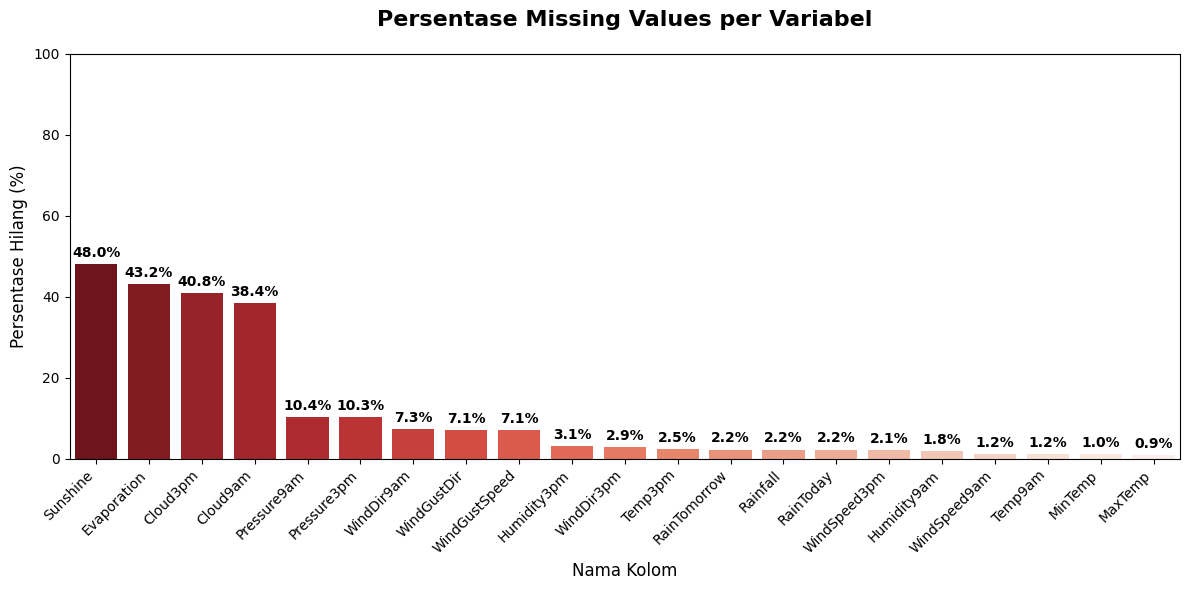

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung persentase
missing_percent = df.isnull().sum() / len(df) * 100

# Filter dari terbesar ke terkecil (Descending)
missing_data = missing_percent[missing_percent > 0].sort_values(ascending=False)

# VISUALISASI
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=missing_data.index, y=missing_data.values, palette='Reds_r')

plt.title('Persentase Missing Values per Variabel', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Persentase Hilang (%)', fontsize=12)
plt.xlabel('Nama Kolom', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)

# 4. MENAMBAHKAN LABEL ANGKA DI ATAS BATANG
for i, v in enumerate(missing_data.values):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## **2.3.2. Data Unique and Duplicate Check:**

In [ ]:
cols = df.columns.tolist()
for col in cols :
  print(f"\n{col} : {df[col].unique()}")
  print(f"Jumlah {col} : {len(df[col].unique())}")


Date : ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
Jumlah Date : 3436

Location : ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Jumlah Location : 49

MinTemp : [13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22. 

In [ ]:
cols = df.columns.tolist()
for col in cols :
  print(f"\n {df[col].value_counts()}")


 Date
2017-06-24    49
2017-06-23    49
2017-06-22    49
2017-06-21    49
2017-06-20    49
              ..
2008-01-27     1
2008-01-28     1
2008-01-29     1
2008-01-30     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64

 Location
Canberra            3436
Sydney              3344
Adelaide            3193
Darwin              3193
Hobart              3193
Perth               3193
Melbourne           3193
Brisbane            3193
Albury              3040
MountGinini         3040
GoldCoast           3040
Wollongong          3040
MountGambier        3040
Launceston          3040
AliceSprings        3040
Albany              3040
Townsville          3040
Bendigo             3040
Cairns              3040
Ballarat            3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
PerthAirport        3009
Williamtown         3009
Cobar               3009
BadgerysCreek       3009
SydneyAirport       3009
Richmond            3009
Moree               3009
Coffs

In [ ]:
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")

# Jika ingin melihat datanya:
# display(df[df.duplicated()])

Jumlah baris duplikat: 0


# **2.4. Univariate Analysis**

## **2.4.1. Target Distribution (Imbalance Check):**


Proporsi Target (RainTomorrow):
RainTomorrow
No     77.581878
Yes    22.418122
Name: proportion, dtype: float64


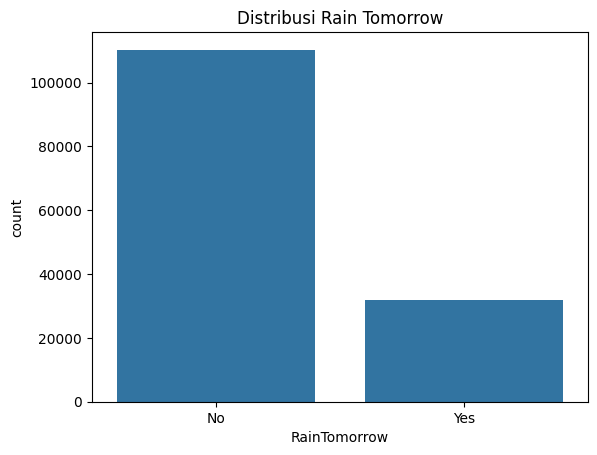

In [ ]:
# Cek proporsi target
target_counts = df['RainTomorrow'].value_counts(normalize=True) * 100
print("\nProporsi Target (RainTomorrow):")
print(target_counts)

# Visualisasi simpel
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribusi Rain Tomorrow')
plt.show()

### **Kesimpulan**
* **Statistik:** Rasio kelas adalah sekitar **78% No (Kering)** berbanding **22% Yes (Hujan)**.
    * **Critical Imbalance:** Akurasi prediksi model berpotensi akan selalu tebak 'No' . Oleh karena itu, **Akurasi** tidak bisa dijadikan metrik utama. Gunakan **F1-Score, ROC-AUC, atau Recall**.
    * **Preprocessing:** Wajib menerapkan teknik penyeimbang seperti **SMOTE** (Synthetic Minority Over-sampling Technique) atau **Class Weighting** pada fungsi *loss* model.

## **2.4.2. Numerical Distributions :**

In [ ]:
# Setup Style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
# Palette custom: Biru untuk Hujan, Abu-abu untuk Tidak
custom_palette = {"Yes": "#1f77b4", "No": "#d62728"}

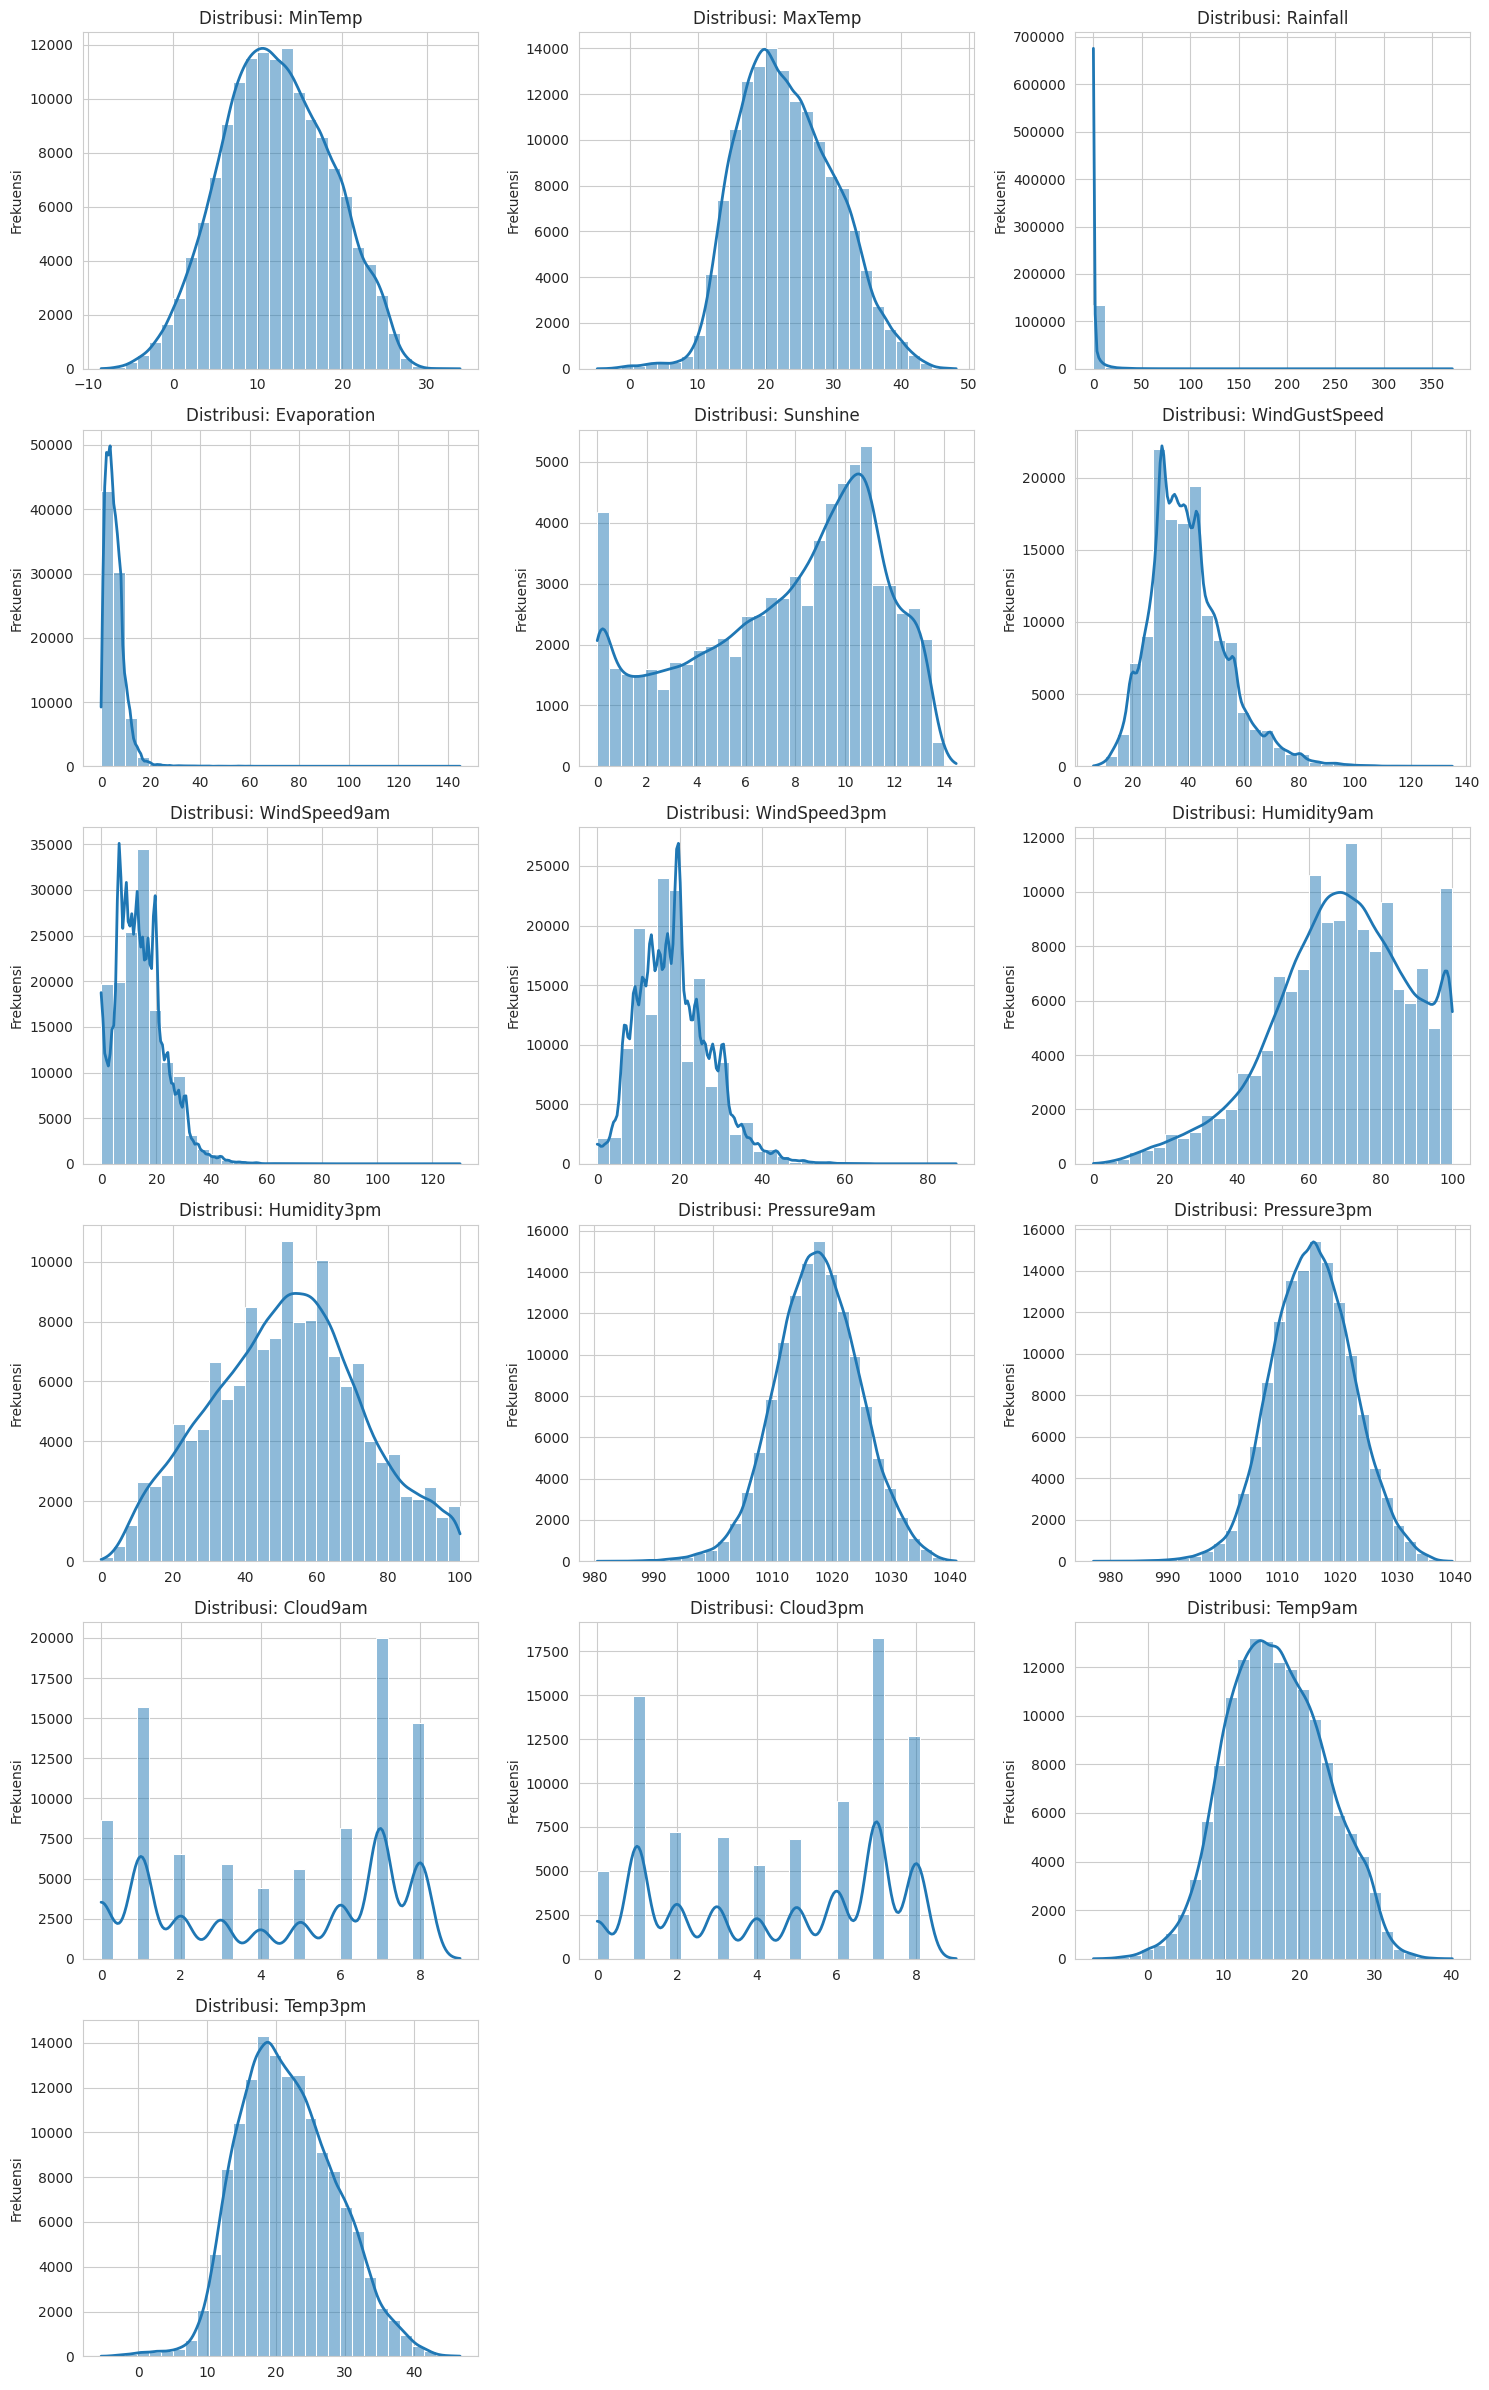

In [ ]:
# Ambil kolom numerik
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Setup Grid Layout
n_cols = 3  # Jumlah grafik ke samping
n_rows = -(-len(numeric_cols) // n_cols) # Hitung butuh berapa baris ke bawah

plt.figure(figsize=(15, 4 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)

    # Plot Histogram dengan garis kurva (KDE)
    sns.histplot(df[col], kde=True, bins=30, color='#1f77b4', line_kws={'linewidth': 2})

    plt.title(f'Distribusi: {col}')
    plt.xlabel('')
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

### **Kesimpulan**
Visualisasi histogram di atas memetakan distribusi frekuensi dari setiap variabel numerik. Dari bentuk kurva dan penyebarannya, kita dapat mengelompokkan variabel ke dalam tiga karakteristik utama yang menentukan strategi *preprocessing* kita:

#### **A. Distribusi Gaussian (Normal)**
Kelompok ini memiliki bentuk lonceng (*Bell-Curve*) yang simetris atau hampir simetris.
* **Variabel:** `MinTemp`, `MaxTemp`, `Temp9am`, `Temp3pm`, `Pressure9am`, `Pressure3pm`, `Humidity3pm`.
* **Visual Insight:**
    * Variabel **Tekanan Udara (Pressure)** memiliki distribusi yang normal. Ini menunjukkan bahwa tekanan atmosfer cenderung stabil di sekitar nilai rata-rata (1015-1017 hPa).
    * Variabel **Suhu (Temp)** juga mendekati normal, meskipun sedikit melebar, mencerminkan variasi musiman yang alami.

#### **B. Distribusi Heavily Right-Skewed (Miring ke Kanan)**
Kelompok ini memiliki ekor panjang ke kanan, di mana mayoritas data berkumpul di nilai rendah (kiri).
* **Variabel:** `Rainfall`, `Evaporation`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`.
* **Visual Insight:**
    * **Rainfall (Curah Hujan):** Ini adalah distribusi paling ekstrem. Hampir seluruh bar berkumpul di angka 0 (hari tidak hujan), dengan *tail* yang sangat tipis memanjang ke kanan. Ini mengonfirmasi bahwa hujan adalah *event* yang jarang namun bisa bernilai ekstrem.
    * **WindSpeed (Kecepatan Angin):** Mayoritas hari memiliki angin tenang hingga sedang, namun ekor kanan menunjukkan adanya kejadian badai (*gust*) yang signifikan.
* **Solusi :**
    * Data ini **tidak boleh** langsung dimasukkan ke model linear tanpa transformasi, karena akan bias terhadap nilai rendah.
    * **Wajib** dilakukan transformasi untuk memampatkan *tail* tersebut agar distribusi lebih mendekati normal. Metode yang disarankan: **Log Transformation (`np.log1p`)** atau **Box-Cox Transformation**.

#### **C. Distribusi Unik & Bimodal**
Kelompok ini memiliki pola distribusi yang tidak standar.
* **Sunshine (Sinar Matahari):**
    * Terlihat pola yang agak tidak beraturan dengan lonjakan frekuensi di nilai 0 (mendung total) dan nilai tinggi (cerah total).
* **Cloud9am & Cloud3pm (Awan):**
    * Grafik terlihat "bergelombang" dengan celah-celah. Ini terjadi karena pengukuran awan menggunakan satuan **Oktas (0-8)** yang bersifat diskret (bilangan bulat), bukan kontinu.
    * Terlihat lonjakan pada nilai 0 (langit bersih) dan 8 (mendung total/overcast).
* **Humidity9am (Kelembaban Pagi):**
    * Berbeda dengan sore hari (`Humidity3pm`) yang normal, kelembaban pagi cenderung menumpuk di nilai tinggi (70-100%). Ini wajar karena suhu pagi yang dingin meningkatkan kelembaban relatif.
* **Solusi:**
    * Untuk `Cloud`, pertimbangkan memperlakukannya sebagai variabel **Ordinal** atau Kategorikal, bukan numerik murni.
    * Untuk `Humidity9am`, transformasi data mungkin tidak terlalu berpengaruh, namun *scaling* tetap diperlukan (MinMax Scaler cocok karena batasnya jelas 0-100).

## **2.4.3. Categorical Distributions**:

/tmp/ipython-input-4091213566.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')
/tmp/ipython-input-4091213566.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')
/tmp/ipython-input-4091213566.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')
/tmp/ipython-input-4091213566.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign

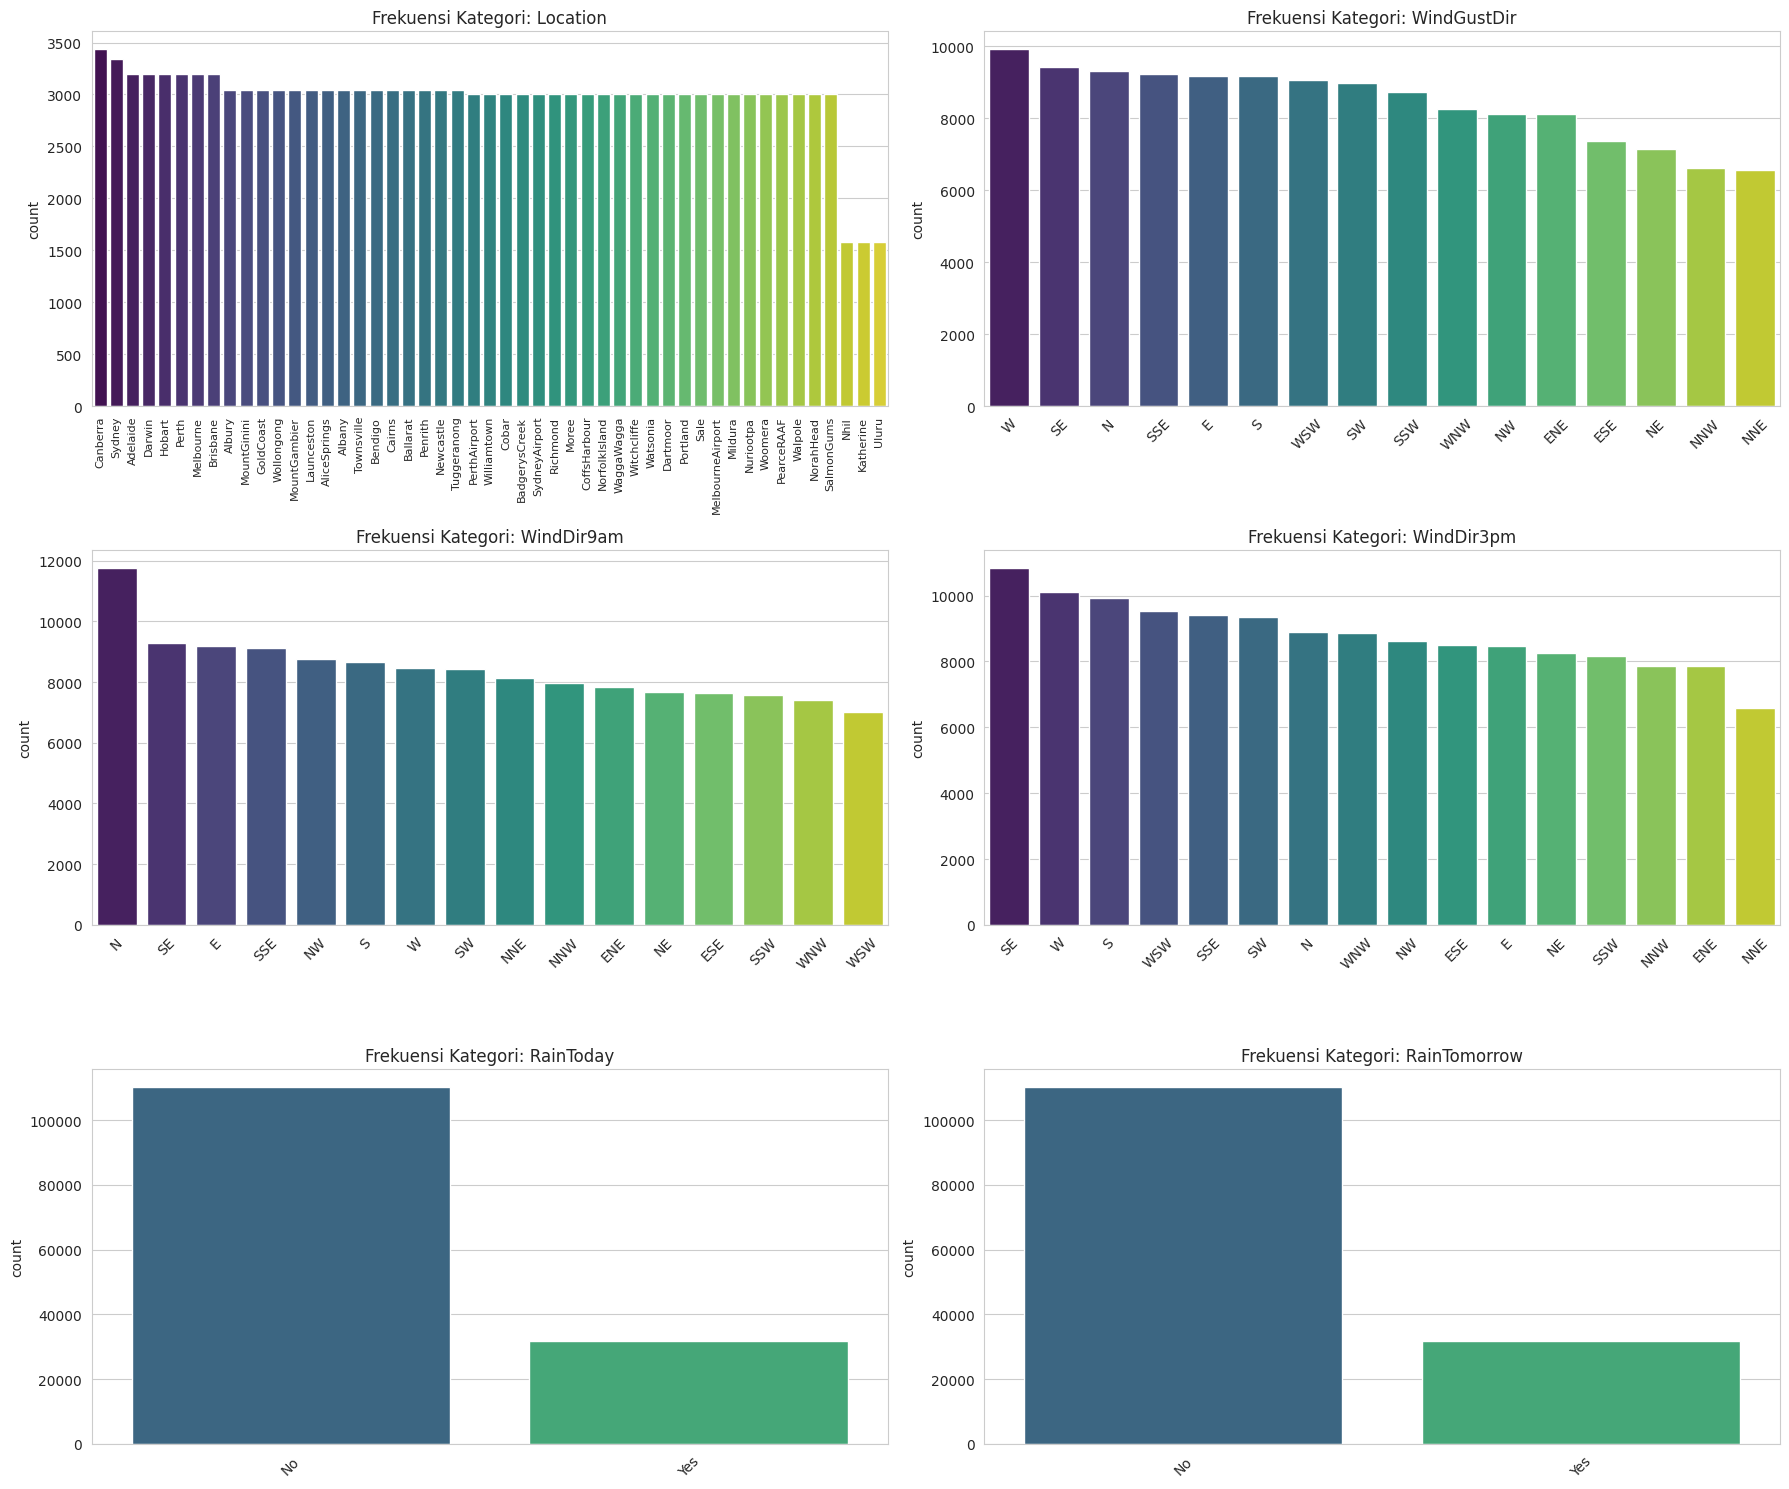

In [ ]:
# Ambil kolom kategorikal, buang Date karena bukan kategori diskrit
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = [c for c in cat_cols if c != 'Date']

# Setup Grid Layout
n_cols = 2
n_rows = -(-len(cat_cols) // n_cols)

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(cat_cols):
    plt.subplot(n_rows, n_cols, i + 1)

    # Urutkan berdasarkan jumlah terbanyak agar rapi
    order = df[col].value_counts().index

    sns.countplot(data=df, x=col, order=order, palette='viridis')

    plt.title(f'Frekuensi Kategori: {col}')
    plt.xlabel('')

    # Jika kolom adalah Location, putar label 90 derajat agar tidak bertumpuk
    if col == 'Location':
        plt.xticks(rotation=90, fontsize=8)
    else:
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### **Kesimpulan**
Visualisasi distribusi frekuensi pada fitur kategorikal mengungkapkan karakteristik demografi data, bias sampling, dan tantangan ketidakseimbangan kelas (*class imbalance*).

#### **A. Target Variable & Persistence (RainTomorrow & RainToday)**
* **Visual:** Kedua plot menunjukkan ketidakseimbangan yang ekstrem. Bar 'No' (Biru/Ungu) mendominasi secara signifikan dibandingkan 'Yes' (Hijau/Kuning).
* **Statistik:** Rasio kelas adalah sekitar **78% No (Kering)** berbanding **22% Yes (Hujan)**.
    * **Critical Imbalance:** Akurasi prediksi model berpotensi akan selalu tebak 'No' . Oleh karena itu, **Akurasi** tidak bisa dijadikan metrik utama. Gunakan **F1-Score, ROC-AUC, atau Recall**.
    * **Preprocessing:** Wajib menerapkan teknik penyeimbang seperti **SMOTE** (Synthetic Minority Over-sampling Technique) atau **Class Weighting** pada fungsi *loss* model.

#### **B. Wind Direction Dynamics (Arah Angin)**
Analisis ketiga fitur arah angin (`WindGustDir`, `WindDir9am`, `WindDir3pm`) menunjukkan pola dinamis yang menarik:
* **WindGustDir (Angin Kencang):**
    * Didominasi oleh arah **Barat (W)**. Ini mencerminkan pola *Westerlies* yang membawa front cuaca dari Samudra Hindia, yang sering diasosiasikan dengan badai.
* **WindDir9am (Pagi Hari):**
    * Didominasi oleh arah **Utara (N)**. Pada pagi hari, angin darat (*Land Breeze*) atau sisa angin monsun sering bertiup dari utara/interior yang lebih hangat.
* **WindDir3pm (Sore Hari):**
    * Terjadi pergeseran drastis. Dominasi berpindah ke arah **Selatan/Tenggara (SE/S)**. Ini adalah bukti fenomena **Sea Breeze** (angin laut) yang masuk ke daratan saat sore hari untuk mendinginkan suhu daratan.
* **Encoding Strategy:** Karena arah angin memiliki siklus (Utara di 0 derajat dekat dengan Barat Laut di 315 derajat), penggunaan *Label Encoding* biasa akan menghilangkan informasi spasial ini. **Sangat disarankan** menggunakan **Cyclic Encoding (Transformasi Sin/Cos)** agar model memahami kontinuitas arah mata angin.

#### **C. Spatial Distribution (Location)**
* **Visual:** Terdapat 49 lokasi stasiun cuaca. Distribusi tidak seragam sempurna. Stasiun di kota besar (Sydney, Melbourne, Canberra) memiliki jumlah observasi lebih banyak (~3000+) dibandingkan lokasi terpencil (Uluru, Katherine ~1500).
* **Insight:** Terdapat bias sampling spasial. Data lebih merepresentasikan wilayah pesisir selatan yang berpopulasi padat dibanding wilayah gurun atau tropis utara.
    * Risiko model menjadi *bias* terhadap pola cuaca perkotaan selatan.
    * **Encoding:** Jangan gunakan *One-Hot Encoding* (akan menambah 49 kolom baru yang *sparse*). Gunakan **Target Encoding** atau kelompokkan lokasi berdasarkan **Zona Iklim (Region)** untuk efisiensi.


## **2.5. Outlier Detection Analysis (Analisis Pencilan)**

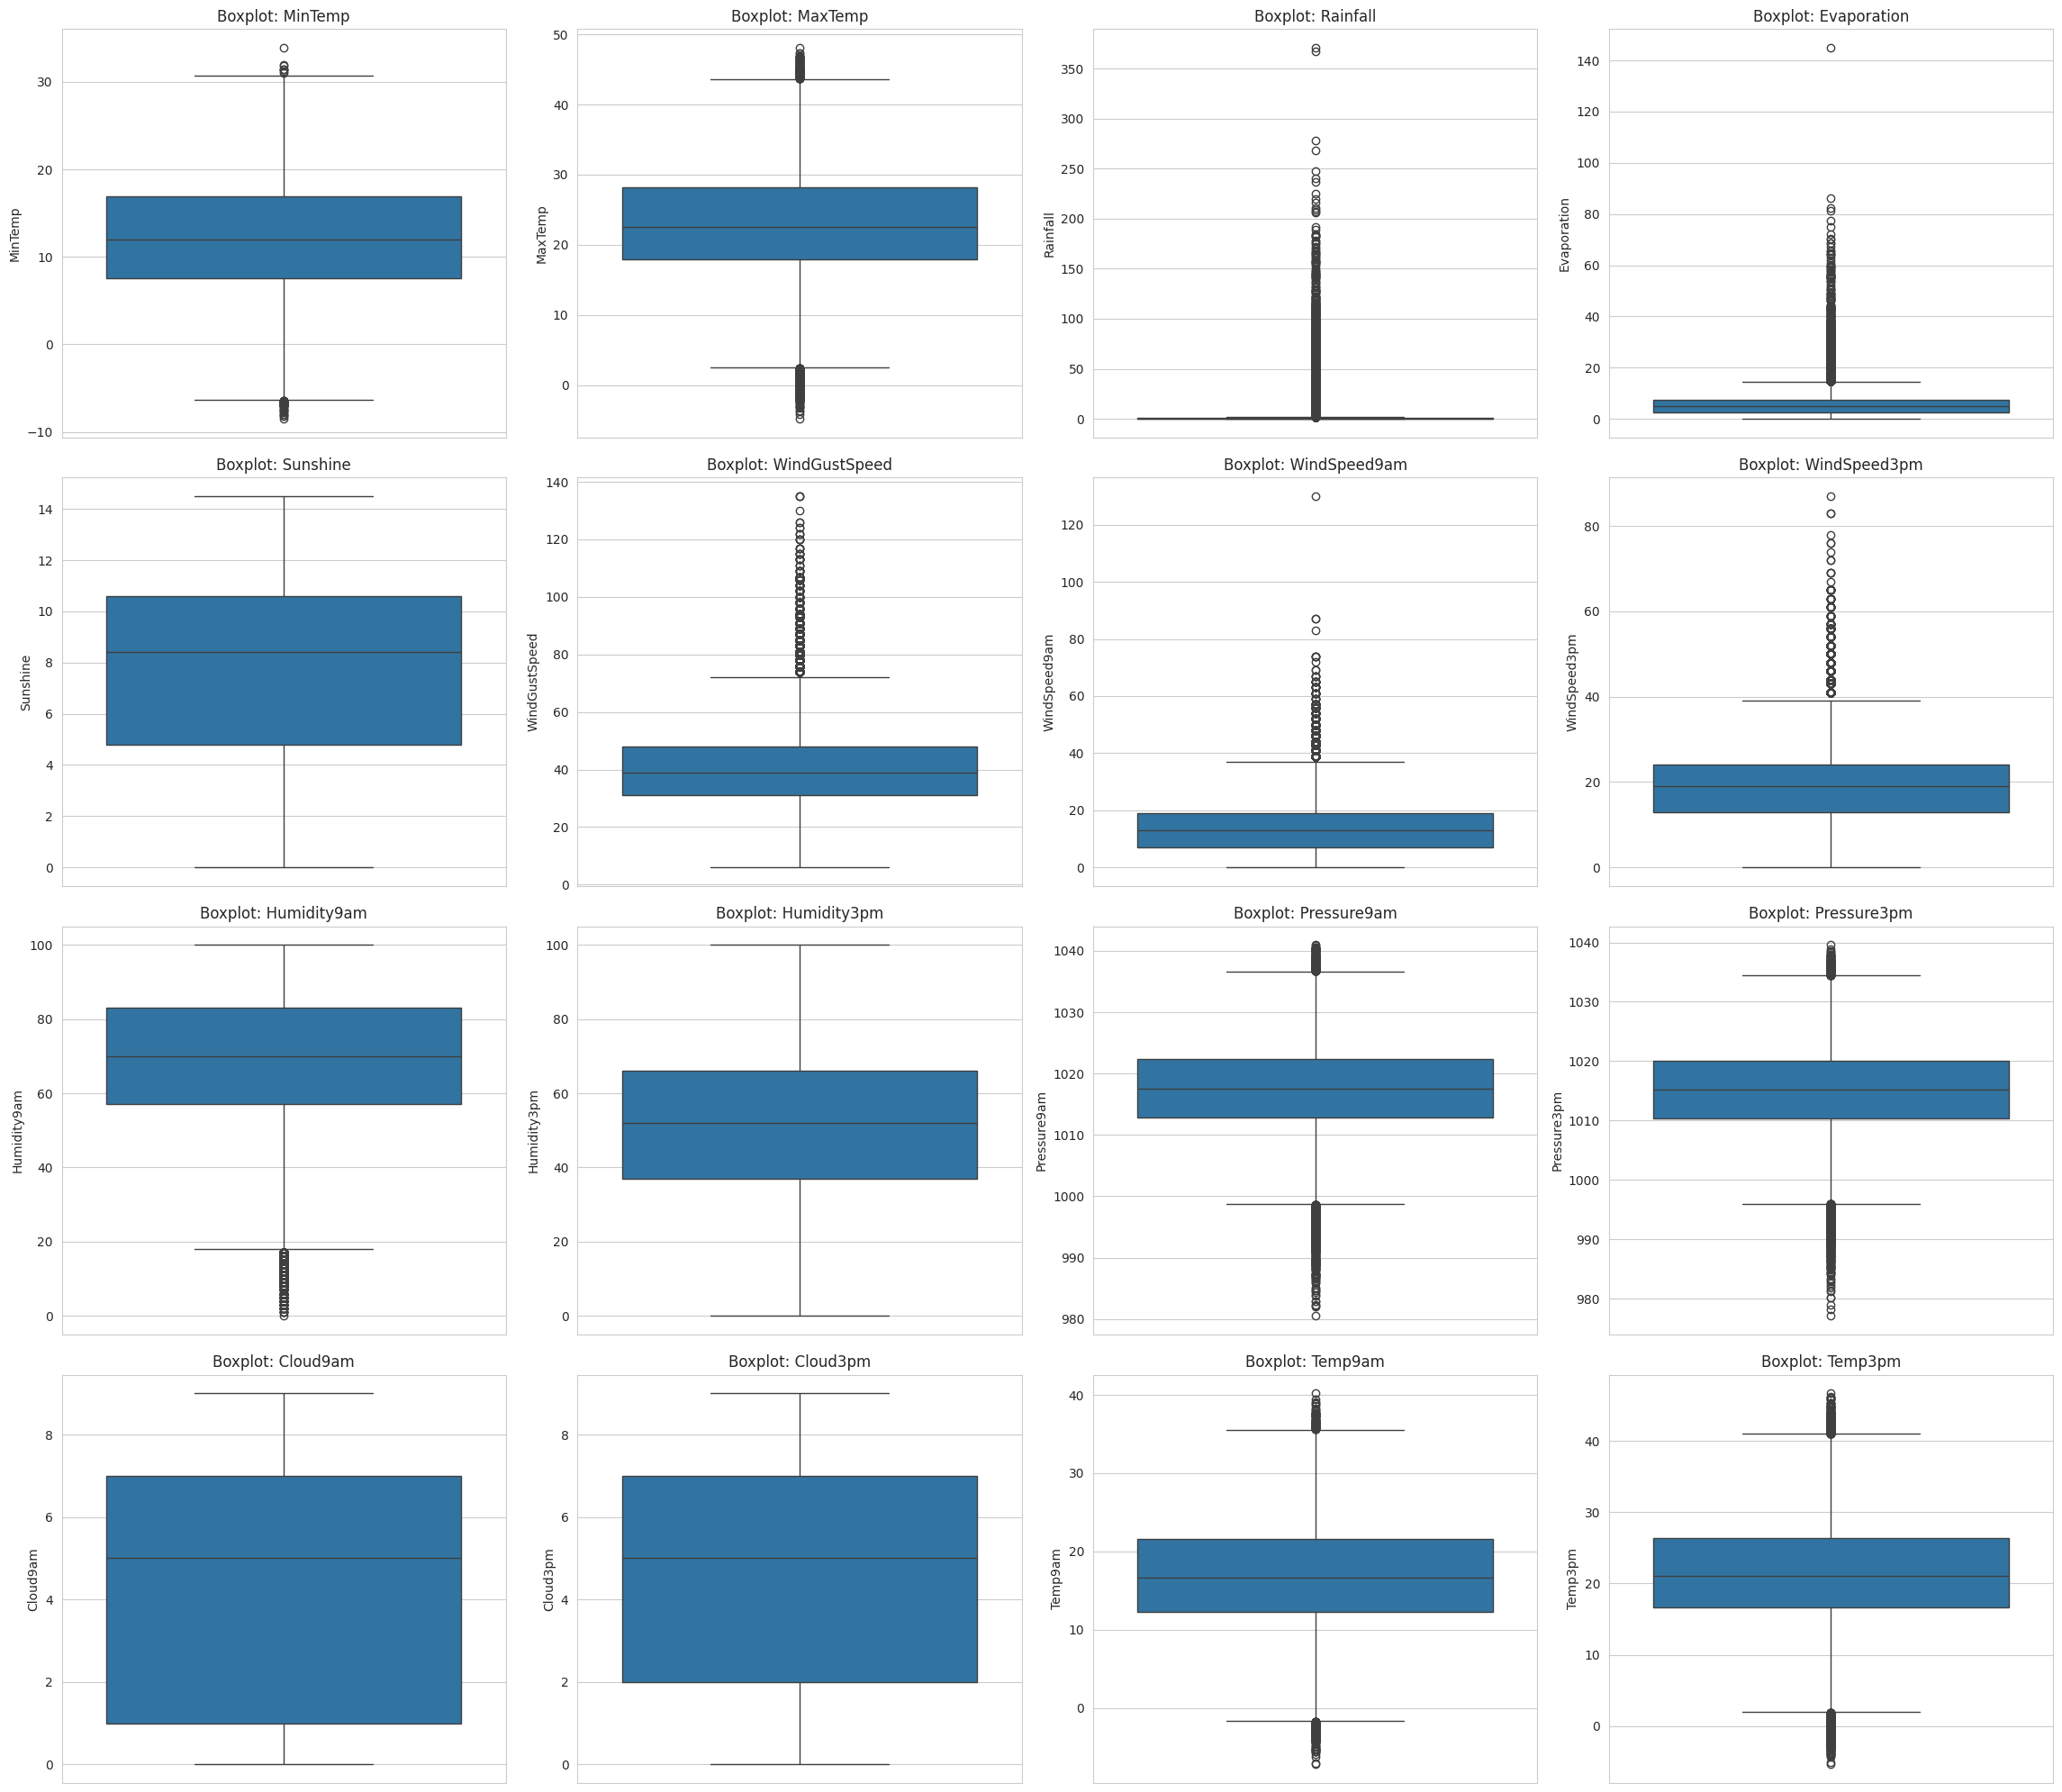

In [ ]:
import math

# Pilih kolom numerik untuk dicek (contoh: curah hujan dan kecepatan angin)
cols_to_check = df.select_dtypes(include=['number']).columns
n_features = len(cols_to_check)

# 2. Setup Grid
n_cols = 4
n_rows = math.ceil(n_features / n_cols)
plt.figure(figsize=(23, 20))

for i, col in enumerate(cols_to_check):
    plt.subplot(n_rows, n_cols, i+1)  # Use dynamically calculated n_rows and n_cols
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

In [ ]:
def cek_persentase_outlier(df):
    # Hanya ambil kolom numerik
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    outlier_list = []

    for col in numeric_cols:
        # Hitung Q1 (25%) dan Q3 (75%)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Tentukan batas bawah dan atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Hitung jumlah data yang keluar dari batas (outlier)
        total_outlier = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        percentage = (total_outlier / len(df)) * 100

        outlier_list.append({
            'Nama Kolom': col,
            'Jumlah Outlier': total_outlier,
            'Persentase (%)': round(percentage, 2),
            'Skewness': round(df[col].skew(), 2) # Tambahan: Cek kemiringan data
        })

    # Buat dataframe hasil
    outlier_df = pd.DataFrame(outlier_list)

    # Urutkan dari persentase tertinggi
    return outlier_df.sort_values(by='Persentase (%)', ascending=False)

# Jalankan fungsi
laporan_outlier = cek_persentase_outlier(df)
display(laporan_outlier)

,Nama Kolom,Jumlah Outlier,Persentase (%),Skewness
2,Rainfall,25578,17.58,9.84
5,WindGustSpeed,3092,2.13,0.87
7,WindSpeed3pm,2523,1.73,0.63
3,Evaporation,1995,1.37,3.76
6,WindSpeed9am,1817,1.25,0.78
8,Humidity9am,1425,0.98,-0.48
10,Pressure9am,1191,0.82,-0.10
11,Pressure3pm,919,0.63,-0.05
15,Temp3pm,764,0.53,0.24
1,MaxTemp,489,0.34,0.22


### **Kesimpulan**
Visualisasi Boxplot digunakan untuk mendeteksi pencilan (*outliers*) dan memahami penyebaran data. Analisis menunjukkan bahwa dataset memiliki variabilitas ekstrem yang valid secara meteorologis.

#### **A. Highly Skewed Features (Curah Hujan & Angin)**
Kelompok ini memiliki distribusi *Right-Skewed* yang ekstrem dengan banyak *outliers* di sisi atas.
* **Rainfall (Curah Hujan):**
    * **Visual:** Distribusi yang sangat miring dan memiliki *outliers* ekstrem hingga ~350mm.
    * **Insight Meteorologis:** Mayoritas hari di Australia adalah kering, tetapi *outliers* merepresentasikan kejadian hujan deras akibat Siklon Tropis (di Utara) atau *Cold Fronts* (di Selatan).
* **WindGustSpeed & WindSpeed (Kecepatan Angin):**
    * **Visual:** Median ~40 km/h dengan *outliers* memanjang hingga >140 km/h (badai).
    * **Insight Meteorologis:** Kecepatan ekstrem ini valid dan terkait dengan badai atau *thunderstorms*, terutama di wilayah pantai timur.
* **Evaporation:**
    * **Visual:** Miring ke kanan dengan banyak *outliers* atas (>15mm).
    * **Insight:** Tingkat penguapan ekstrem terjadi pada hari-hari musim panas yang kering dan berangin di wilayah pedalaman.

#### **B. Symmetric/Normal Features (Suhu & Tekanan)**
Kelompok ini memiliki distribusi yang mendekati Normal (Gausian) dengan *outliers* yang relatif sedikit dan simetris.
* **Temperature (Min, Max, Temp9am, Temp3pm):**
    * **Visual:** terlihat simetris, *Outliers* bawah (< -5°C) mewakili gelombang dingin, sedangkan *outliers* atas (> 45°C) mewakili gelombang panas (*Heatwaves*).
* **Pressure (9am & 3pm):**
    * **Visual:** Sangat simetris dengan median ~1015-1017 hPa.
    * **Insight:** *Outliers* bawah (<990 hPa) adalah indikator kuat sistem badai/siklon (*Low Pressure*), sedangkan atas (>1040 hPa) adalah sistem antisiklon kering (*High Pressure*).

#### **C. Bounded Features (Kelembaban & Langit)**
Kelompok ini dibatasi oleh rentang waktu atau persen (0-100% atau 0-24 jam).
* **Humidity (9am & 3pm):**
    * **Visual:** *Skewed Left*. Lebih banyak *outliers* di sisi bawah (kering ekstrem <10-20%).
    * **Insight:** Kelembaban rendah umum terjadi di wilayah gurun. Data >100% adalah *error* pengukuran yang harus di-*clip* ke 100.
* **Cloud & Sunshine:**
    * **Visual:** Terlihat cukup Tersebar, *Sunshine* memiliki distribusi uniform, sedangkan *Cloud* bersifat diskret (0-9 oktas).

---
### **Kesimpulan Strategi Outliers**
1.  **Validitas Data:** Hampir seluruh *outliers* dalam dataset ini merepresentasikan fenomena cuaca nyata (Badai, Gelombang Panas, Kekeringan), bukan *error* input.
2.  **Keputusan Preprocessing:** Kita **tidak akan menghapus outliers** baris demi baris karena akan menghilangkan informasi tentang kejadian ekstrem (kelas minoritas 'Yes').
3.  **Transformasi:**
    * Fitur *Skewed* (Rainfall, Wind) -> **Log Transform** atau **Robust Scaler**.
    * Fitur *Normal* (Temp, Pressure) -> **Standard Scaler**.

# **2.6. Bivariate Analysis (Hubungan Antar Variabel)**

## **2.6.1. Correlation Matrix (Heatmap):**

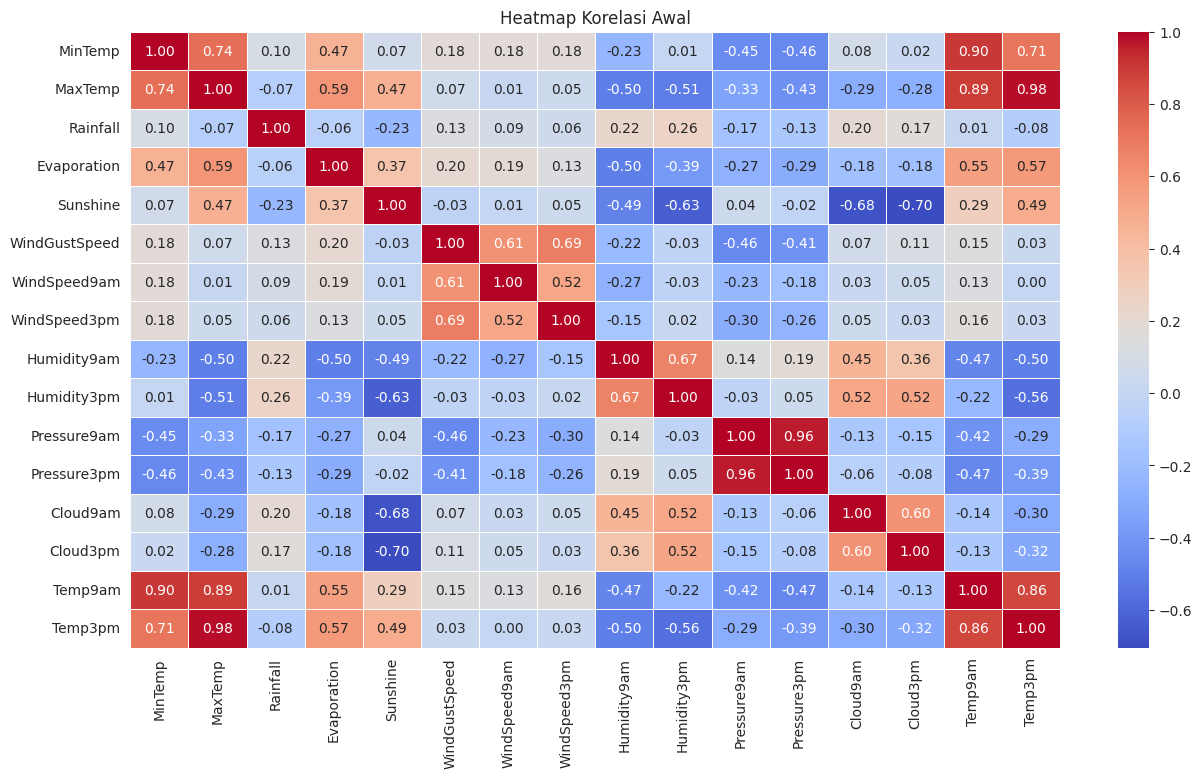

In [ ]:
# Hitung korelasi antar kolom numerik
# Kita gunakan numeric_only=True karena korelasi hanya untuk angka
correlation = df.corr(numeric_only=True)

plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True,fmt = ".2f", cmap='coolwarm', linewidths= 0.5)
plt.title("Heatmap Korelasi Awal")
plt.show()

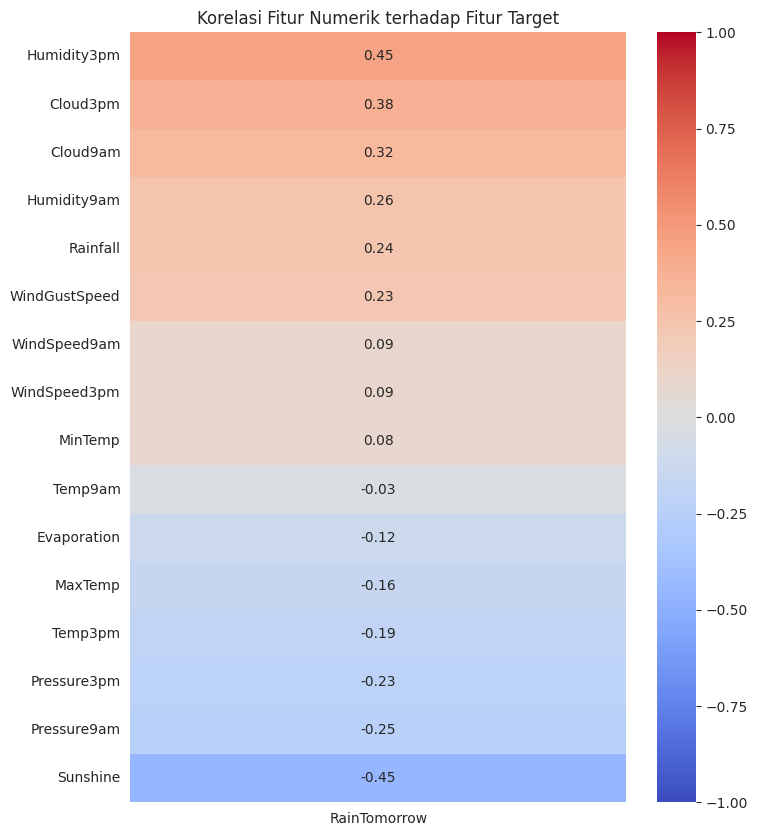

In [ ]:
#Menampilkan Korelasi Fitur Numerik terhadap Fitur Target
df_corr = df.copy()

# Ubah Target menjadi Angka (Yes=1, No=0)
df_corr['RainTomorrow'] = df_corr['RainTomorrow'].map({'Yes': 1, 'No': 0})

# Hitung Korelasi fitur numerik
correlation = df_corr.corr(numeric_only=True)

# Setting agar korelasi hanya terhadap 'RainTomorrow'
target_corr = correlation['RainTomorrow'].sort_values(ascending=False)

# Visualisasi Fokus ke Target
plt.figure(figsize=(8, 10))
sns.heatmap(target_corr.drop('RainTomorrow').to_frame(),
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=-1, vmax=1,
            cbar=True)

plt.title('Korelasi Fitur Numerik terhadap Fitur Target')
plt.show()

### **Kesimpulan**
Heatmap korelasi di atas digunakan untuk mendeteksi *multicollinearity* (korelasi antar prediktor) dan mengidentifikasi pola hubungan meteorologis. Berikut adalah analisis mendalam per kelompok variabel:

#### **A. Temperature Cluster (Suhu)**
* **Visual:** Terdapat blok korelasi positif yang sangat kuat (warna merah tua). Pasangan **MaxTemp vs. Temp3pm** memiliki korelasi hampir sempurna (**r=0.98**), dan **MinTemp vs. Temp9am** (**r=0.90**).
* **Insight Meteorologis:** Hal ini mencerminkan siklus diurnal (harian) termodinamika. Suhu pagi (9am) adalah fondasi bagi suhu siang (Max), dan suhu sore (3pm) biasanya mendekati suhu maksimum harian.
* **High Multicollinearity Risk**. Korelasi > 0.9 dapat menyebabkan koefisien model linear (Logistic Regression) menjadi tidak stabil (*inflate variance*).
    * **Solusi:** Pilih salah satu fitur yang redundan (misal: Pertahankan `MaxTemp`, buang `Temp3pm`) atau gunakan teknik **PCA** (*Principal Component Analysis*) untuk mereduksi dimensi tanpa kehilangan informasi.

#### **B. Atmospheric Pressure Cluster (Tekanan Udara)**
* **Visual:** Korelasi positif ekstrem antara **Pressure9am vs. Pressure3pm** (**r=0.96**).
* **Insight Meteorologis:** Sistem tekanan udara (Siklon/Antisiklon) adalah fenomena berskala besar yang perubahannya terjadi secara gradual, sehingga tekanan pagi dan sore sangat identik.
* Fitur ini sangat redundan. Disarankan untuk **menggabungkan keduanya** (rata-rata tekanan harian) atau membuang salah satu untuk efisiensi model.

#### **C. Humidity, Cloud, & Sunshine (Kelembaban & Penyinaran)**
* **Visual:** Terdapat korelasi negatif yang kuat (warna biru) antara **Sunshine vs. Cloud3pm** (**r=-0.70**) dan **Humidity3pm vs. Sunshine** (**r=-0.63**).
* **Insight Meteorologis:** Saat kelembaban dan awan tinggi (mendung), durasi penyinaran matahari otomatis rendah. Di musim hujan tropis Australia, *Low-Pressure Troughs* meningkatkan kelembaban sekaligus memblokir matahari.
* Hubungan negatif yang kuat ini berguna. Jika variabel `Sunshine` memiliki banyak *missing values*, variabel `Cloud` dapat digunakan sebagai *proxy* (pengganti) yang efektif, atau sebaliknya.

#### **D. Wind Cluster (Angin)**
* **Visual:** Korelasi moderat (warna oranye muda). **WindGustSpeed vs. WindSpeed3pm** (**r=0.69**).
* **Insight Meteorologis:** Angin kencang (*Gust*) berkorelasi dengan kecepatan angin sore karena efek turbulensi dan pemanasan konvektif sore hari. Namun, korelasinya tidak ekstrem, menandakan bahwa *Gust* membawa informasi unik (kejadian badai sesaat) yang berbeda dengan angin rata-rata.
* Kedua fitur cukum aman digunakan bersamaan. Fitur ini cukup independen dan baik untuk memberikan diversitas pada model *Ensemble* (Random Forest/XGBoost). Pertimbangkan membuat fitur interaksi (misal: `WindSpeed * WindDir`).

---
### **Kesimpulan Strategi Korelasi**
1.  **Redundansi Kritis:** Pasangan `Pressure9am-3pm` dan `Temp3pm-MaxTemp` harus ditangani (drop salah satu atau rata-rata) untuk mencegah *Overfitting* pada model linear.
2.  **Validasi Domain:** Pola korelasi (negatif antara Sunshine dengan Cloud) memvalidasi kualitas data (sensor bekerja sesuai logika fisika atmosfer).

## **2.6.2. Distribusi Fitur Numerical Terhadap Fitur Target :**

/tmp/ipython-input-1921537271.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='RainTomorrow', y=col, palette={"Yes": "#1f77b4", "No": "#d62728"})
/tmp/ipython-input-1921537271.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='RainTomorrow', y=col, palette={"Yes": "#1f77b4", "No": "#d62728"})
/tmp/ipython-input-1921537271.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='RainTomorrow', y=col, palette={"Yes": "#1f77b4", "No": "#d62728"})
/tmp/ipython-input-1921537271.py:15: FutureWarning: 

Passing

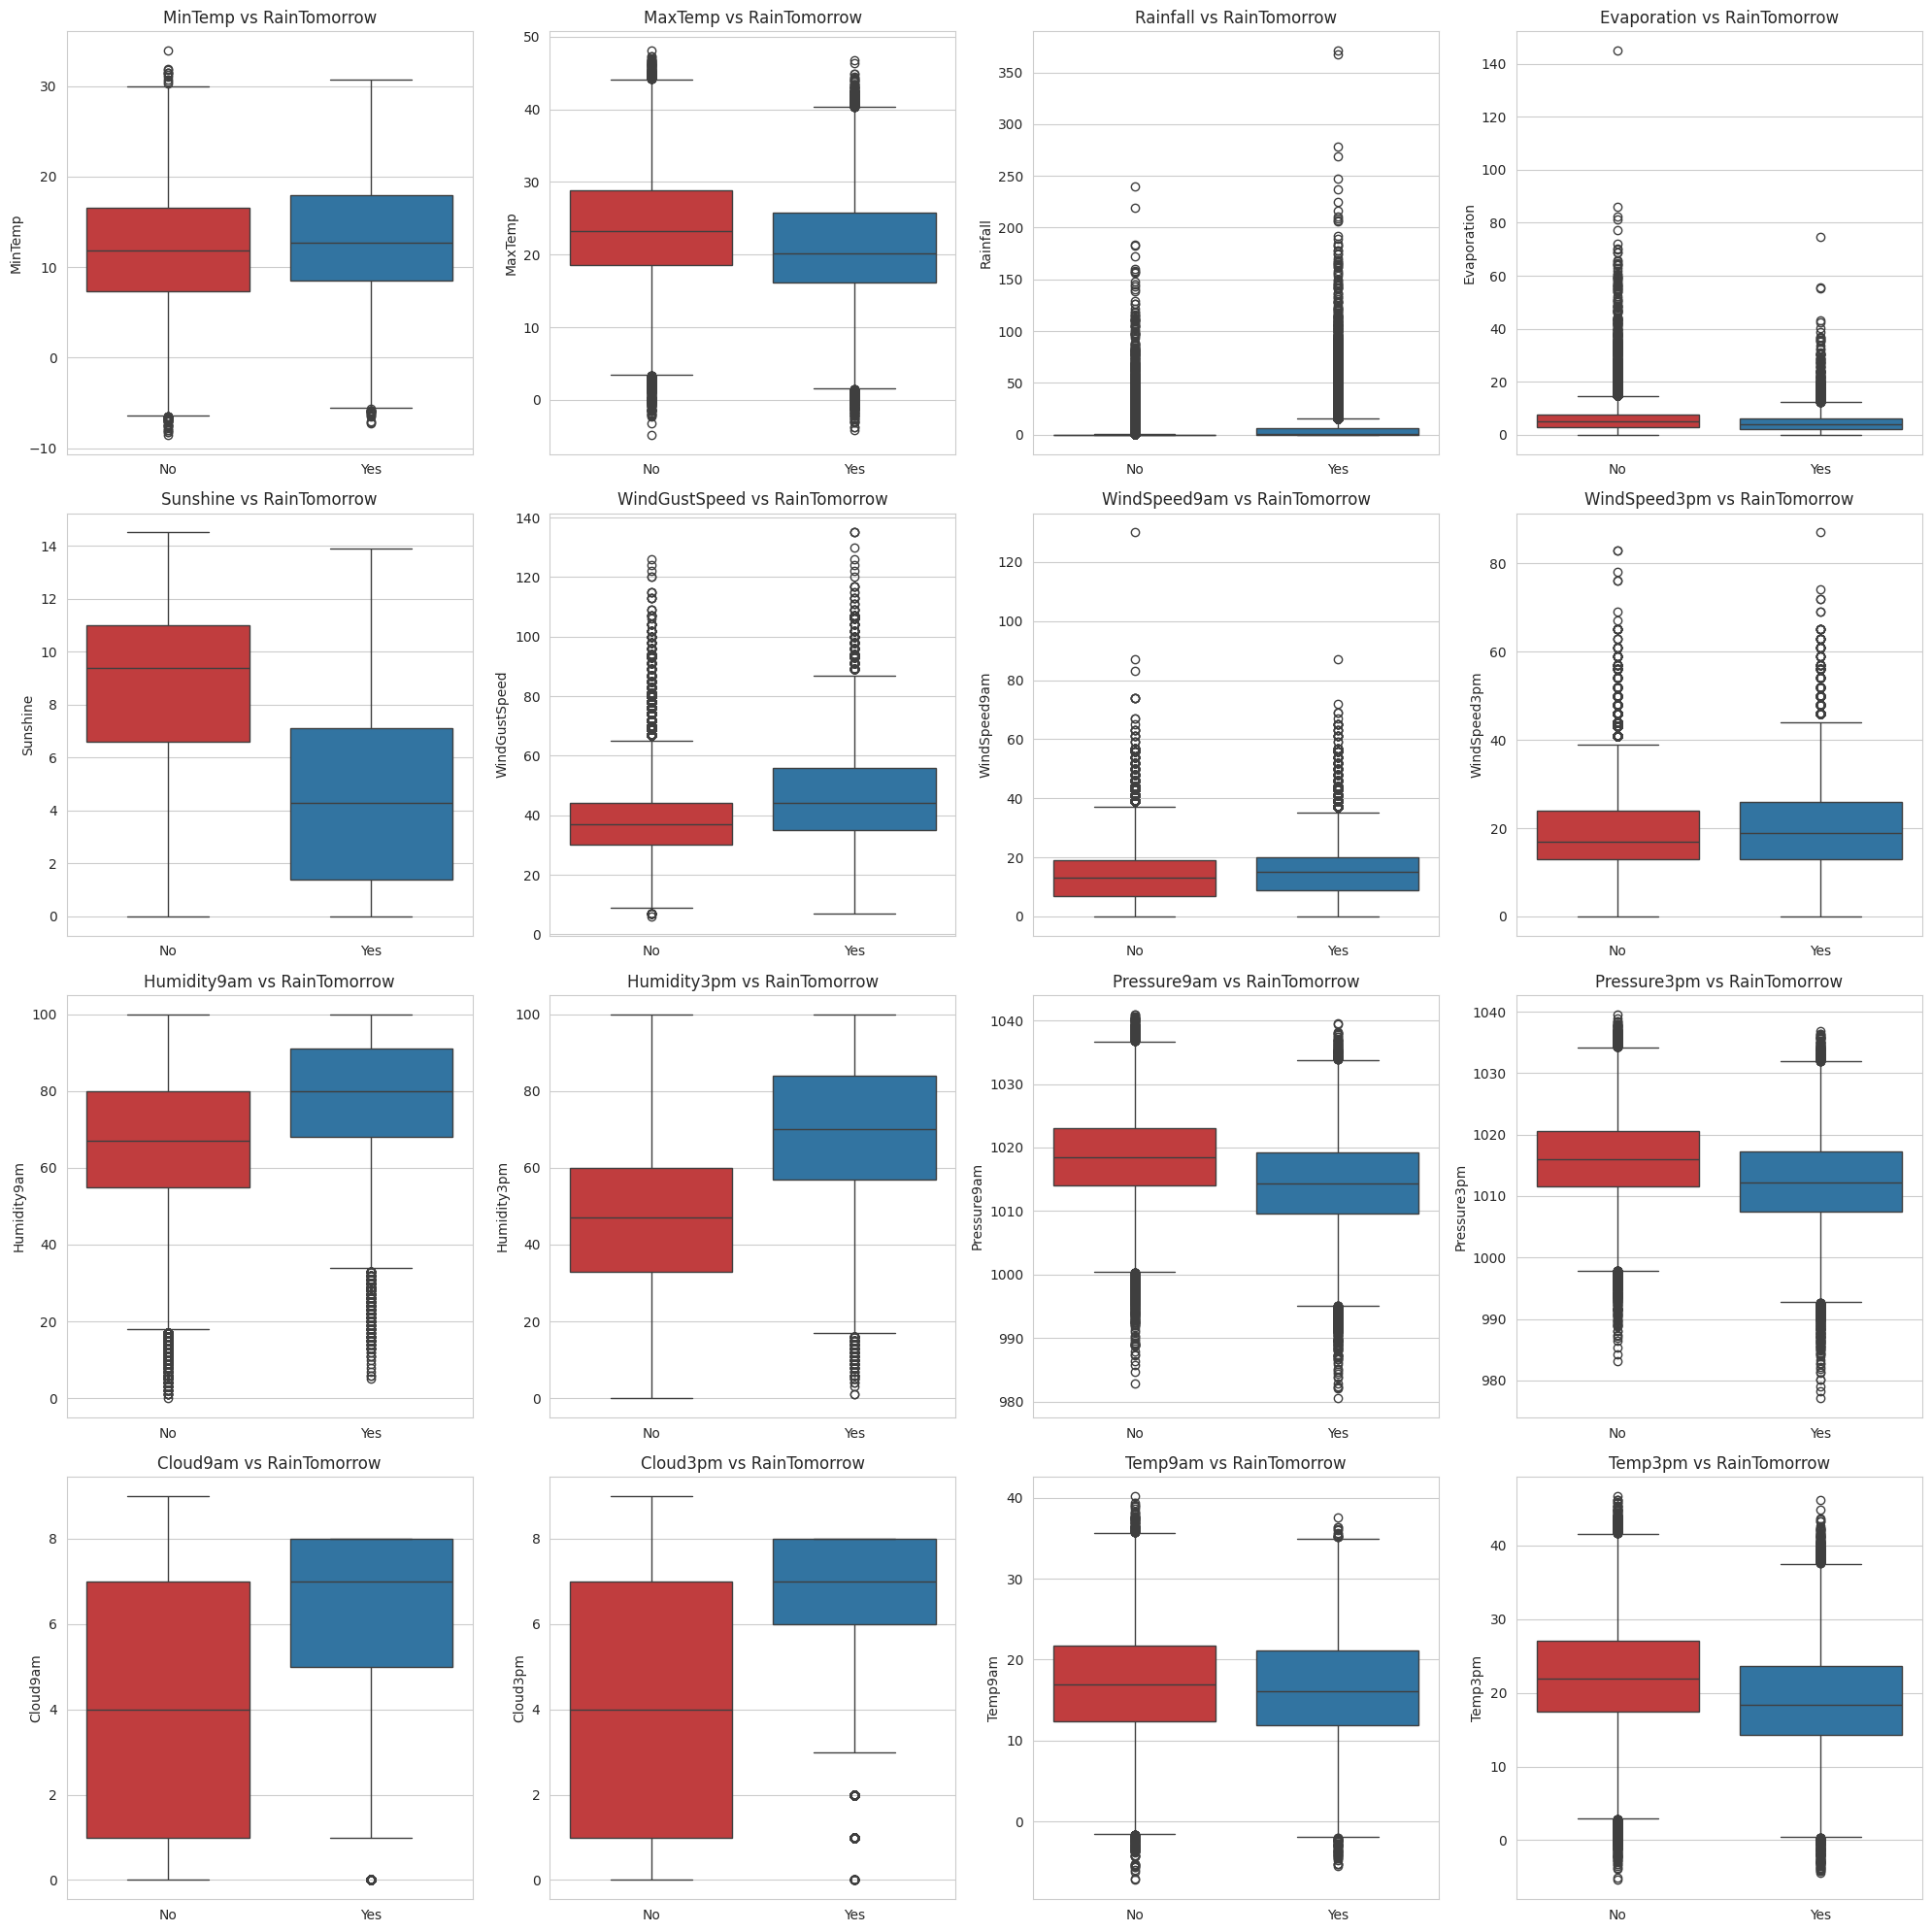

In [ ]:
# Ambil semua kolom numerik
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Hapus kolom yang tidak relevan untuk plot (jika ada, misal year/month jika sudah diekstrak)
# num_cols = num_cols.drop(['Month']) # Opsional

# Setup layout grid (misal 4 kolom per baris)
n_cols = 4
n_rows = -(-len(num_cols) // n_cols)  # Ceiling division

plt.figure(figsize=(20, 5 * n_rows))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    # Gunakan Boxplot untuk melihat median dan outlier
    sns.boxplot(data=df, x='RainTomorrow', y=col, palette={"Yes": "#1f77b4", "No": "#d62728"})

    # Alternatif: Gunakan Violinplot untuk melihat bentuk distribusi
    # sns.violinplot(data=df, x='RainTomorrow', y=col, palette={"Yes": "#1f77b4", "No": "#d62728"})

    plt.title(f'{col} vs RainTomorrow')
    plt.xlabel('')

plt.tight_layout()
plt.show()

### **Kesimpulan**
Analisis hubungan bivariat antara fitur numerik dan target `RainTomorrow` menggunakan Boxplot mengungkapkan pola distribusi yang berbeda secara signifikan. Berikut adalah analisis mendalam berdasarkan kategori meteorologi:

#### **A. Temperature Features (Suhu)**
* **MinTemp (Suhu Minimum):**
    * **Visual:** Median untuk kelas 'Yes' (~14°C) lebih tinggi dibandingkan 'No' (11°C). Boxplot 'Yes' memiliki IQR yang lebih sempit namun *whiskers* memanjang ke atas.
    * **Insight Meteorologis:** Suhu minimum yang lebih hangat sering terjadi pada malam sebelum hujan karena kelembaban tinggi (awan) menahan panas bumi agar tidak lepas ke atmosfer (efek rumah kaca lokal).
    * **ML Strategy:** Fitur ini berguna untuk model non-linear. Disarankan menggunakan *Standard Scaler* karena distribusi mendekati normal.
* **MaxTemp (Suhu Maksimum) & Temp3pm:**
    * **Visual:** Kebalikan dari MinTemp, median 'Yes' (~20°C) justru lebih rendah daripada 'No' (~24°C).
    * **Insight Meteorologis:** Suhu maksimum yang rendah mengindikasikan adanya tutupan awan (mendung) atau sistem tekanan rendah yang menghalangi pemanasan matahari di siang hari.
    * **ML Strategy:** Prediktor yang moderat. Perlu penanganan *outliers* (misal: *winsorizing*) agar tidak bias pada model sensitif seperti SVM.

#### **B. Moisture & Atmospheric Features (Kelembaban & Hujan)**
* **Rainfall (Curah Hujan Hari Ini):**
    * **Visual:** Distribusi sangat *skewed right*. Median 'Yes' ~2mm sedangkan 'No' hampir datar di 0mm. Banyak *extreme outliers*.
    * **Insight Meteorologis:** Hujan hari ini memiliki korelasi serial dengan hujan besok (sistem cuaca sering bertahan beberapa hari).
    * **ML Strategy:** Fitur krusial namun menantang karena *skewness*. Wajib melakukan **Log-Transformation** (`log(Rainfall+1)`) atau *binning* menjadi kategori. Gunakan metrik *Precision-Recall* karena ketidakseimbangan kelas.
* **Humidity9am & Humidity3pm:**
    * **Visual:** Salah satu pembeda paling jelas. Median `Humidity3pm` untuk 'Yes' (~65%) jauh lebih tinggi dibanding 'No' (~45%) dengan *overlap* minimal.
    * **Insight Meteorologis:** Kelembaban sore yang tinggi mendekati titik jenuh sering menjadi pemicu kondensasi (hujan) pada malam atau esok harinya.
    * **ML Strategy:** **Top Predictor**. Wajib diprioritaskan dalam *Feature Selection*.
* **Evaporation:**
    * **Visual:** Median 'Yes' lebih rendah (~3mm) dibanding 'No' (~5mm).
    * **Insight:** Tingkat penguapan rendah terjadi saat udara sudah jenuh (lembab) atau mendung, kondisi yang mendukung terjadinya hujan.
    * **ML Strategy:** Prediktor yang baik untuk *Ensemble Model*. Perlu strategi imputasi khusus (misal: median per lokasi) karena memiliki ~43% *missing values*.

#### **C. Sun & Cloud Features (Penyinaran & Awan)**
* **Sunshine (Jam Sinar Matahari):**
    * **Visual:** Median 'Yes' (4 jam) jauh lebih rendah drastis dibanding 'No' (9 jam).
    * **Insight:** Sedikitnya sinar matahari berbanding lurus dengan ketebalan awan. Di Australia utara, ini sangat kuat saat musim monsun.
    * **ML Strategy:** Fitur dengan *Importance* tinggi (sering menjadi *root node* di Decision Tree). Dapat digunakan sebagai *proxy* untuk mengisi *missing values* pada kolom Cloud.
* **Cloud9am & Cloud3pm:**
    * **Visual:** Median tutupan awan 'Yes' (6 oktas) jauh lebih tinggi dibanding 'No' (3 oktas).
    * **Insight:** Tutupan awan adalah indikator fisik langsung dari potensi presipitasi.
    * **ML Strategy:** Karena datanya diskret (0-8), fitur ini bisa diperlakukan sebagai variabel ordinal.

#### **D. Wind & Pressure Features (Angin & Tekanan)**
* **WindGustSpeed:**
    * **Visual:** Median 'Yes' (45 km/h) lebih tinggi dibanding 'No' (35 km/h) dengan banyak *outlier* ekstrem.
    * **Insight:** Angin kencang sering diasosiasikan dengan turbulensi front cuaca atau badai yang membawa hujan.
    * **ML Strategy:** Berguna untuk deteksi kejadian ekstrem. *Robust Scaler* disarankan untuk menangani *outliers*.
* **Pressure9am & Pressure3pm:**
    * **Visual:** Median 'Yes' lebih rendah dibanding 'No'.
    * **Insight:** Penurunan tekanan udara (*Low Pressure System*) adalah tanda fisik masuknya sistem badai.
    * **ML Strategy:** Korelasi antar kedua fitur ini sangat tinggi (*multicollinearity*). Pertimbangkan untuk menggabungkannya (rata-rata) atau membuang salah satu jika menggunakan Linear Regression.

---
### **Rekomendasi Preprocessing**
Berdasarkan analisis visual di atas, berikut adalah strategi teknis yang akan diterapkan:
1.  **Top Features:** Variabel `Humidity3pm`, `Sunshine`, `Cloud3pm`, dan `Pressure` menunjukkan perbedaan distribusi terbesar (daya pembeda tinggi). Ini akan menjadi fitur kunci dalam model.
2.  **Transformasi Data:** Variabel `Rainfall` yang sangat miring (*skewed*) akan dinormalisasi menggunakan **Log-Transform**.
3.  **Handling Outliers:** Variabel suhu dan kecepatan angin memiliki banyak *outliers*. Kita akan menggunakan metode yang *robust* atau melakukan *capping*.
4.  **Feature Selection:** Karena adanya korelasi tinggi antar variabel waktu (misal: `Temp9am` vs `MaxTemp`, `Pressure9am` vs `Pressure3pm`), kita perlu melakukan seleksi fitur untuk mencegah multikolinearitas.

## **2.6.2. Distribusi Fitur Kategorikal Terhadap Fitur Target :**

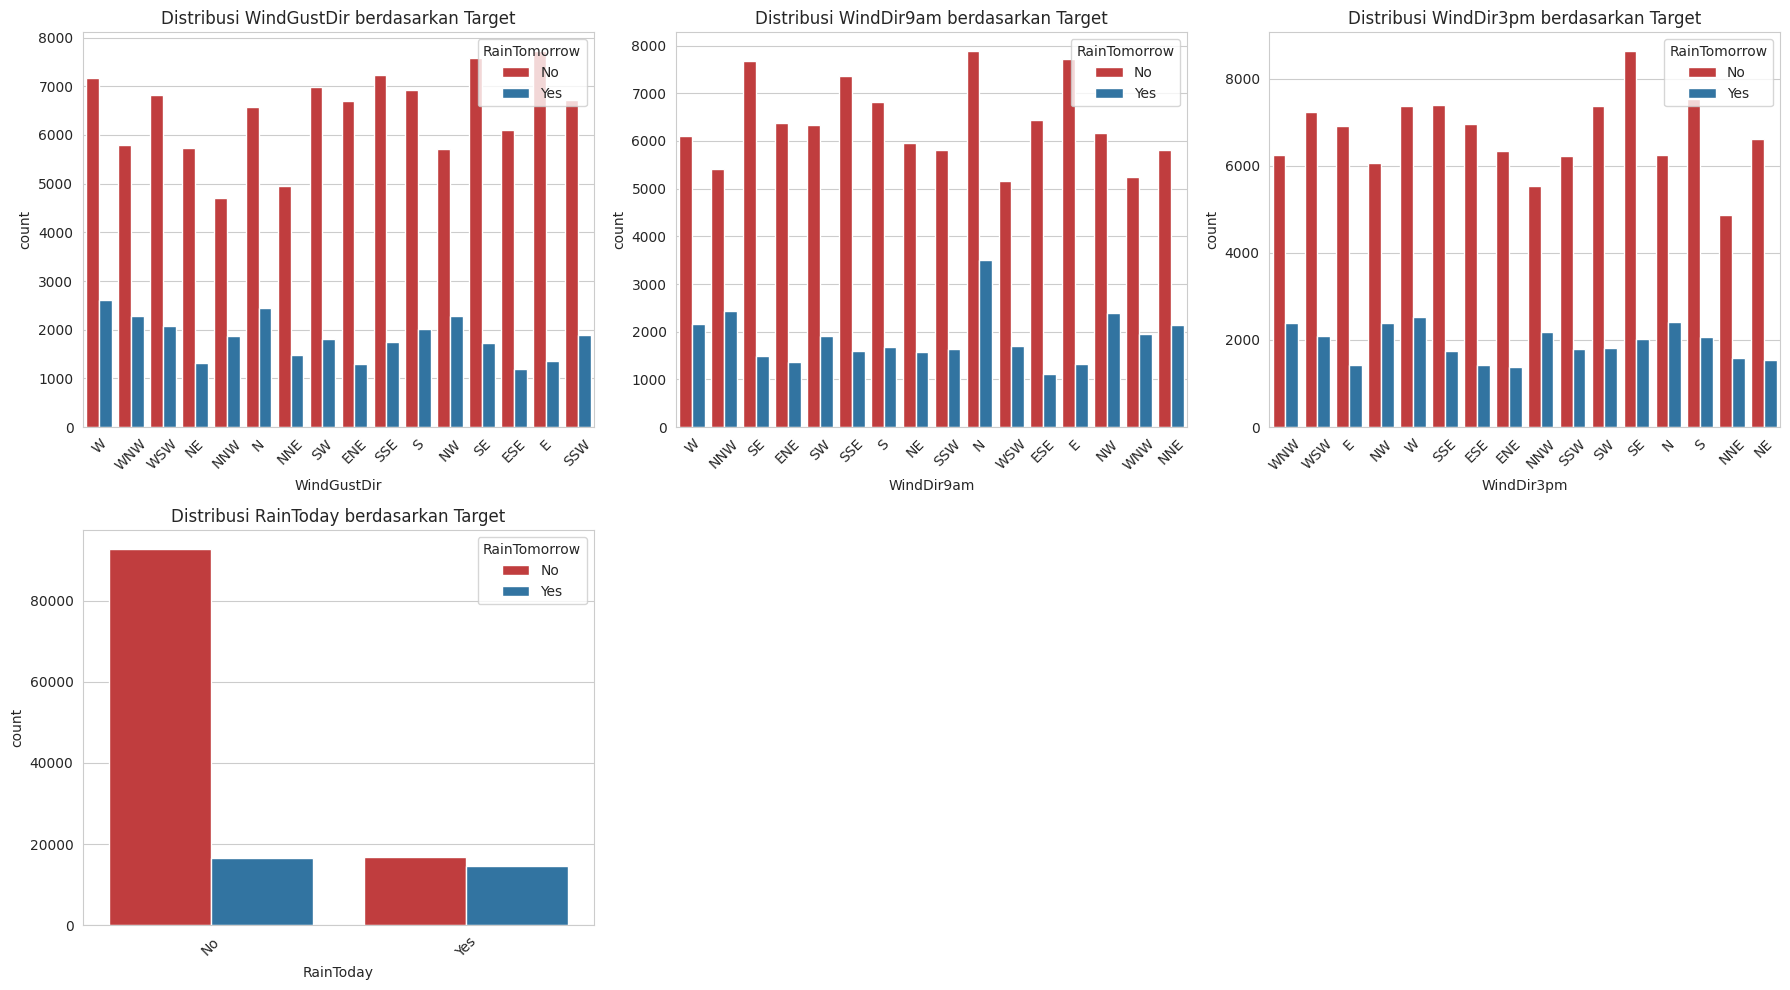

In [ ]:
# Ambil kolom kategorikal (object), kecuali Date dan Location (karena terlalu banyak uniknya)
cat_cols = df.select_dtypes(include=['object']).columns
cols_to_plot = [col for col in cat_cols if col not in ['Date', 'Location', 'RainTomorrow']]

# Setup layout
n_cols = 3
n_rows = -(-len(cols_to_plot) // n_cols)

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(cols_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)

    # Plot Countplot dengan Hue
    sns.countplot(data=df, x=col, hue='RainTomorrow', palette={"Yes": "#1f77b4", "No": "#d62728"})

    plt.title(f'Distribusi {col} berdasarkan Target')
    plt.xticks(rotation=45) # Putar label agar terbaca
    plt.legend(title='RainTomorrow', loc='upper right')

plt.tight_layout()
plt.show()

### **Kesimpulan**
Analisis hubungan antara fitur kategorikal dan target `RainTomorrow` menunjukkan pola dependensi yang signifikan, terutama pada arah angin dan persistensi hujan.

#### **A. Wind Direction Analysis (Arah Angin)**
* **WindGustDir (Arah Angin Terkencang):**
    * **Visual:** Distribusi tidak seragam. Arah angin dari Barat (W, WNW, WSW) mendominasi jumlah observasi tetapi lebih sering dikaitkan dengan cuaca kering (Bar 'No' sangat tinggi). Sebaliknya, arah Selatan-Timur (SSE, SE) menunjukkan proporsi kejadian hujan ('Yes') yang lebih tinggi secara relatif (~30-40% dibandingkan rata-rata ~22%).
    * **Insight Meteorologis:** Angin kencang dari Tenggara (SSE/SE) sering membawa kelembaban dari Laut Tasman ke daratan Australia Timur, yang memicu presipitasi. Angin Barat biasanya terkait sistem tekanan tinggi kering dari gurun interior.
  
* **WindDir9am & WindDir3pm (Arah Angin Pagi & Sore):**
    * **Visual:** Pola serupa dengan *WindGustDir*, di mana angin dari sektor Tenggara (SSE, SE) konsisten menunjukkan rasio kejadian hujan yang lebih tinggi baik pagi maupun sore hari. Puncak kejadian hujan sering terlihat saat angin berhembus dari SSE.
    * **Insight Meteorologis:** Perubahan arah angin dari pagi ke sore (misal: masuknya *Sea Breeze*) adalah indikator penting dinamika cuaca lokal. Angin pagi dari Utara sering diasosiasikan dengan udara panas kering dari pedalaman.

#### **B. Rain Persistence Analysis (Persistensi Hujan)**
* **RainToday (Hujan Hari Ini):**
    * **Visual:** Terdapat perbedaan rasio yang mencolok. Jika `RainToday` = 'No', peluang hujan besok sangat kecil (~15%). Namun, jika `RainToday` = 'Yes', peluang hujan besok melonjak drastis hingga mendekati ~50%.
    * **Insight Meteorologis:** Hujan memiliki sifat persistensi (*persistence*). Sistem cuaca seperti *Monsoon Trough* atau Siklon Tropis sering bertahan selama beberapa hari di suatu wilayah, sehingga hujan hari ini menjadi indikator kuat untuk hujan besok.
  
---
### **Kesimpulan Analisis Kategorikal**
1.  **Dependensi Arah Angin:** Arah angin tidak acak; sektor Tenggara (SE/SSE) adalah pembawa hujan utama, sedangkan sektor Barat (W/NW) cenderung kering. Informasi spasial ini vital.
2.  **Efek Persistensi:** Variabel `RainToday` mengonfirmasi bahwa cuaca hari sebelumnya memiliki korelasi serial yang kuat dengan cuaca hari berikutnya.
3.  **Strategi Encoding:** Mengingat banyaknya kategori pada arah angin (16 arah), teknik *Cyclic Encoding* atau *Target Encoding* lebih disarankan daripada *One-Hot Encoding* untuk menjaga efisiensi dimensi model *tree-based* seperti XGBoost.

## **2.6.3. Time Series Terhadap Beberapa Fitur Untuk Menangkap Pola Tertentu :**

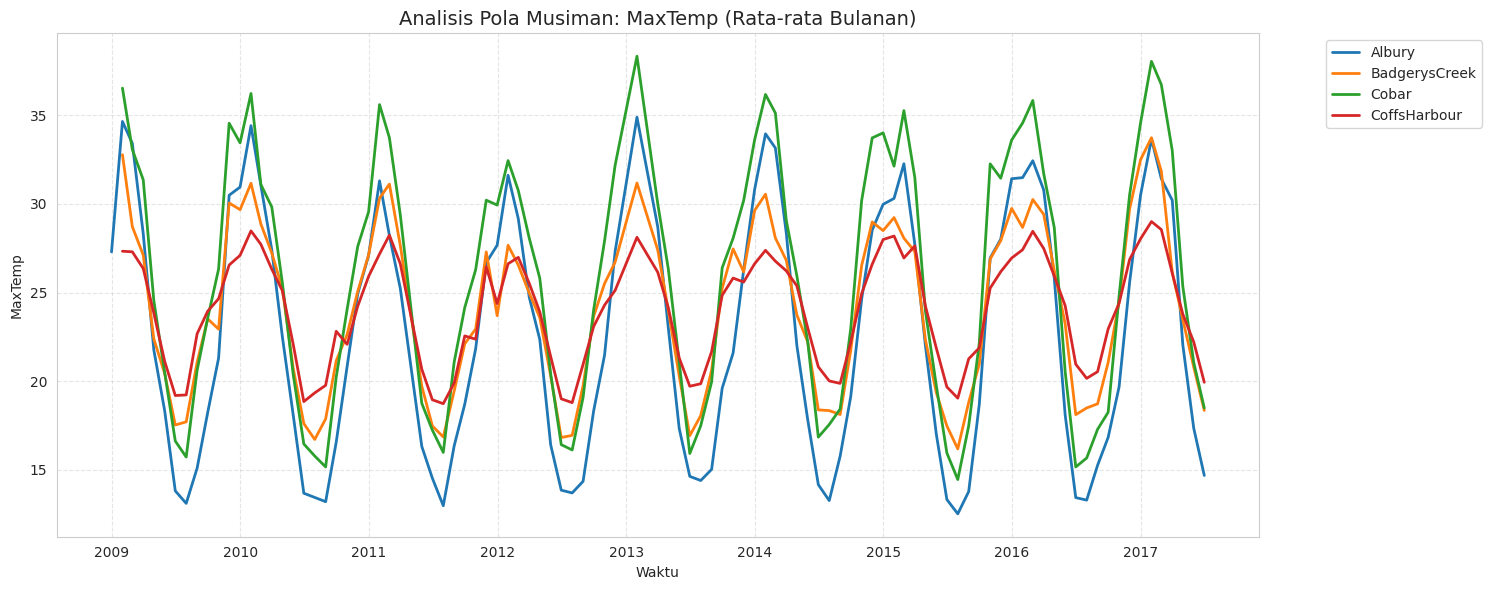

In [ ]:
#Membuat Visualisasi Time Series Terhadap Beberapa Fitur Untuk Menangkap Pola Tertentu

# --- KONFIGURASI ---
feature_to_check = 'MaxTemp'
n_locations = 4

# 1. Filter Data
sample_locations = df['Location'].unique()[:n_locations]
df_subset = df[df['Location'].isin(sample_locations)].copy()

# Ensure 'Date' column in df_subset is datetime type
df_subset['Date'] = pd.to_datetime(df_subset['Date'])

# 2. Resampling
# Mengambil rata-rata bulanan agar tren terlihat lebih halus (smooth)
df_monthly = df_subset.set_index('Date').groupby('Location')[feature_to_check].resample('ME').mean().reset_index()

# 3. Visualisasi Time Series
plt.figure(figsize=(15, 6))
sns.lineplot(
    data=df_monthly,
    x='Date',
    y=feature_to_check,
    hue='Location',
    palette='tab10',
    linewidth=2
)

plt.title(f'Analisis Pola Musiman: {feature_to_check} (Rata-rata Bulanan)', fontsize=14)
plt.ylabel(feature_to_check)
plt.xlabel('Waktu')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Data Cleaning and Transformation

## Fundamental Cleaning

In [ ]:
#  FUNDAMENTAL CLEANING

# 1. Pastikan Date bertipe datetime & Ekstrak Bulan (Krusial untuk Imputasi nanti)
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Catat jumlah data awal
n_awal = len(df)

# 2. Hapus Duplikat (Mencegah bias data ganda)
df.drop_duplicates(inplace=True)
n_dedup = len(df)

# 3. Hapus Baris dengan Target Kosong (RainTomorrow = NaN)
df.dropna(subset=['RainTomorrow'], inplace=True)
n_final = len(df)

# --- OUTPUT LAPORAN ---
print(f"--- REPORT AFTER CLEANING ---")
print(f"Data Awal               : {n_awal} baris")
print(f"Setelah Hapus Duplikat  : {n_dedup} baris (Dibuang: {n_awal - n_dedup})")
print(f"Setelah Hapus Target NaN: {n_final} baris (Dibuang: {n_dedup - n_final})")
print(f"Total Data Bersih Awal  : {n_final} baris")
print("-" * 30)

# Preview perubahan struktur
print("Preview Kolom Baru (Month):")
display(df[['Date', 'Month', 'RainTomorrow']].head())

--- REPORT AFTER CLEANING ---
Data Awal               : 145460 baris
Setelah Hapus Duplikat  : 145460 baris (Dibuang: 0)
Setelah Hapus Target NaN: 142193 baris (Dibuang: 3267)
Total Data Bersih Awal  : 142193 baris
------------------------------
Preview Kolom Baru (Month):


,Date,Month,RainTomorrow
0,2008-12-01,12,No
1,2008-12-02,12,No
2,2008-12-03,12,No
3,2008-12-04,12,No
4,2008-12-05,12,No


## Handling Ouliers

In [ ]:
import numpy as np

# STABILISASI OUTLIER (HANDLING)

# 1. Fungsi Capping (Winsorizing)
def winsorize_series(series, lower=0.01, upper=0.99):
    """Membatasi nilai pada persentil tertentu tanpa menghapus data."""
    low_limit = series.quantile(lower)
    high_limit = series.quantile(upper)
    return series.clip(lower=low_limit, upper=high_limit)

# 2. Daftar kolom untuk di-Capping
# Kita KECUALIKAN 'Rainfall' (karena distribusinya eksponensial, bukan normal)
cols_to_cap = [
    'MinTemp', 'MaxTemp', 'WindGustSpeed',
    'WindSpeed9am', 'WindSpeed3pm',
    'Humidity9am', 'Humidity3pm',
    'Pressure9am', 'Pressure3pm',
    'Temp9am', 'Temp3pm', 'Evaporation'
]

# Eksekusi Capping
# (Hanya untuk kolom yang eksis di df, menghindari error jika kolom Evaporation sudah didrop sebelumnya)
existing_cols = [c for c in cols_to_cap if c in df.columns]

for col in existing_cols:
    df[col] = winsorize_series(df[col])

# 3. Transformasi Logaritmik untuk Rainfall
# Menggunakan log1p (log(x+1)) agar nilai 0 tidak menjadi error (-inf)
df['Rainfall_Log'] = np.log1p(df['Rainfall'])

# --- VERIFIKASI ---
print("--- REPORT AFTER HANDLING OUTLIERS ---")
print("Capping selesai pada kolom:", len(existing_cols), "kolom.")
print("Transformasi Log Rainfall selesai.")

# Cek Skewness sebelum vs sesudah (Harusnya Rainfall_Log jauh lebih kecil skew-nya)
print(f"\nSkewness Rainfall Asli : {df['Rainfall'].skew():.2f}")
print(f"Skewness Rainfall_Log  : {df['Rainfall_Log'].skew():.2f}")

# Cek Max Value WindGustSpeed (Harusnya tidak ada lagi angka ekstrem misal > 135)
if 'WindGustSpeed' in df.columns:
    print(f"Max WindGustSpeed (Capped): {df['WindGustSpeed'].max()}")

--- REPORT AFTER HANDLING OUTLIERS ---
Capping selesai pada kolom: 12 kolom.
Transformasi Log Rainfall selesai.

Skewness Rainfall Asli : 9.89
Skewness Rainfall_Log  : 2.05
Max WindGustSpeed (Capped): 81.0


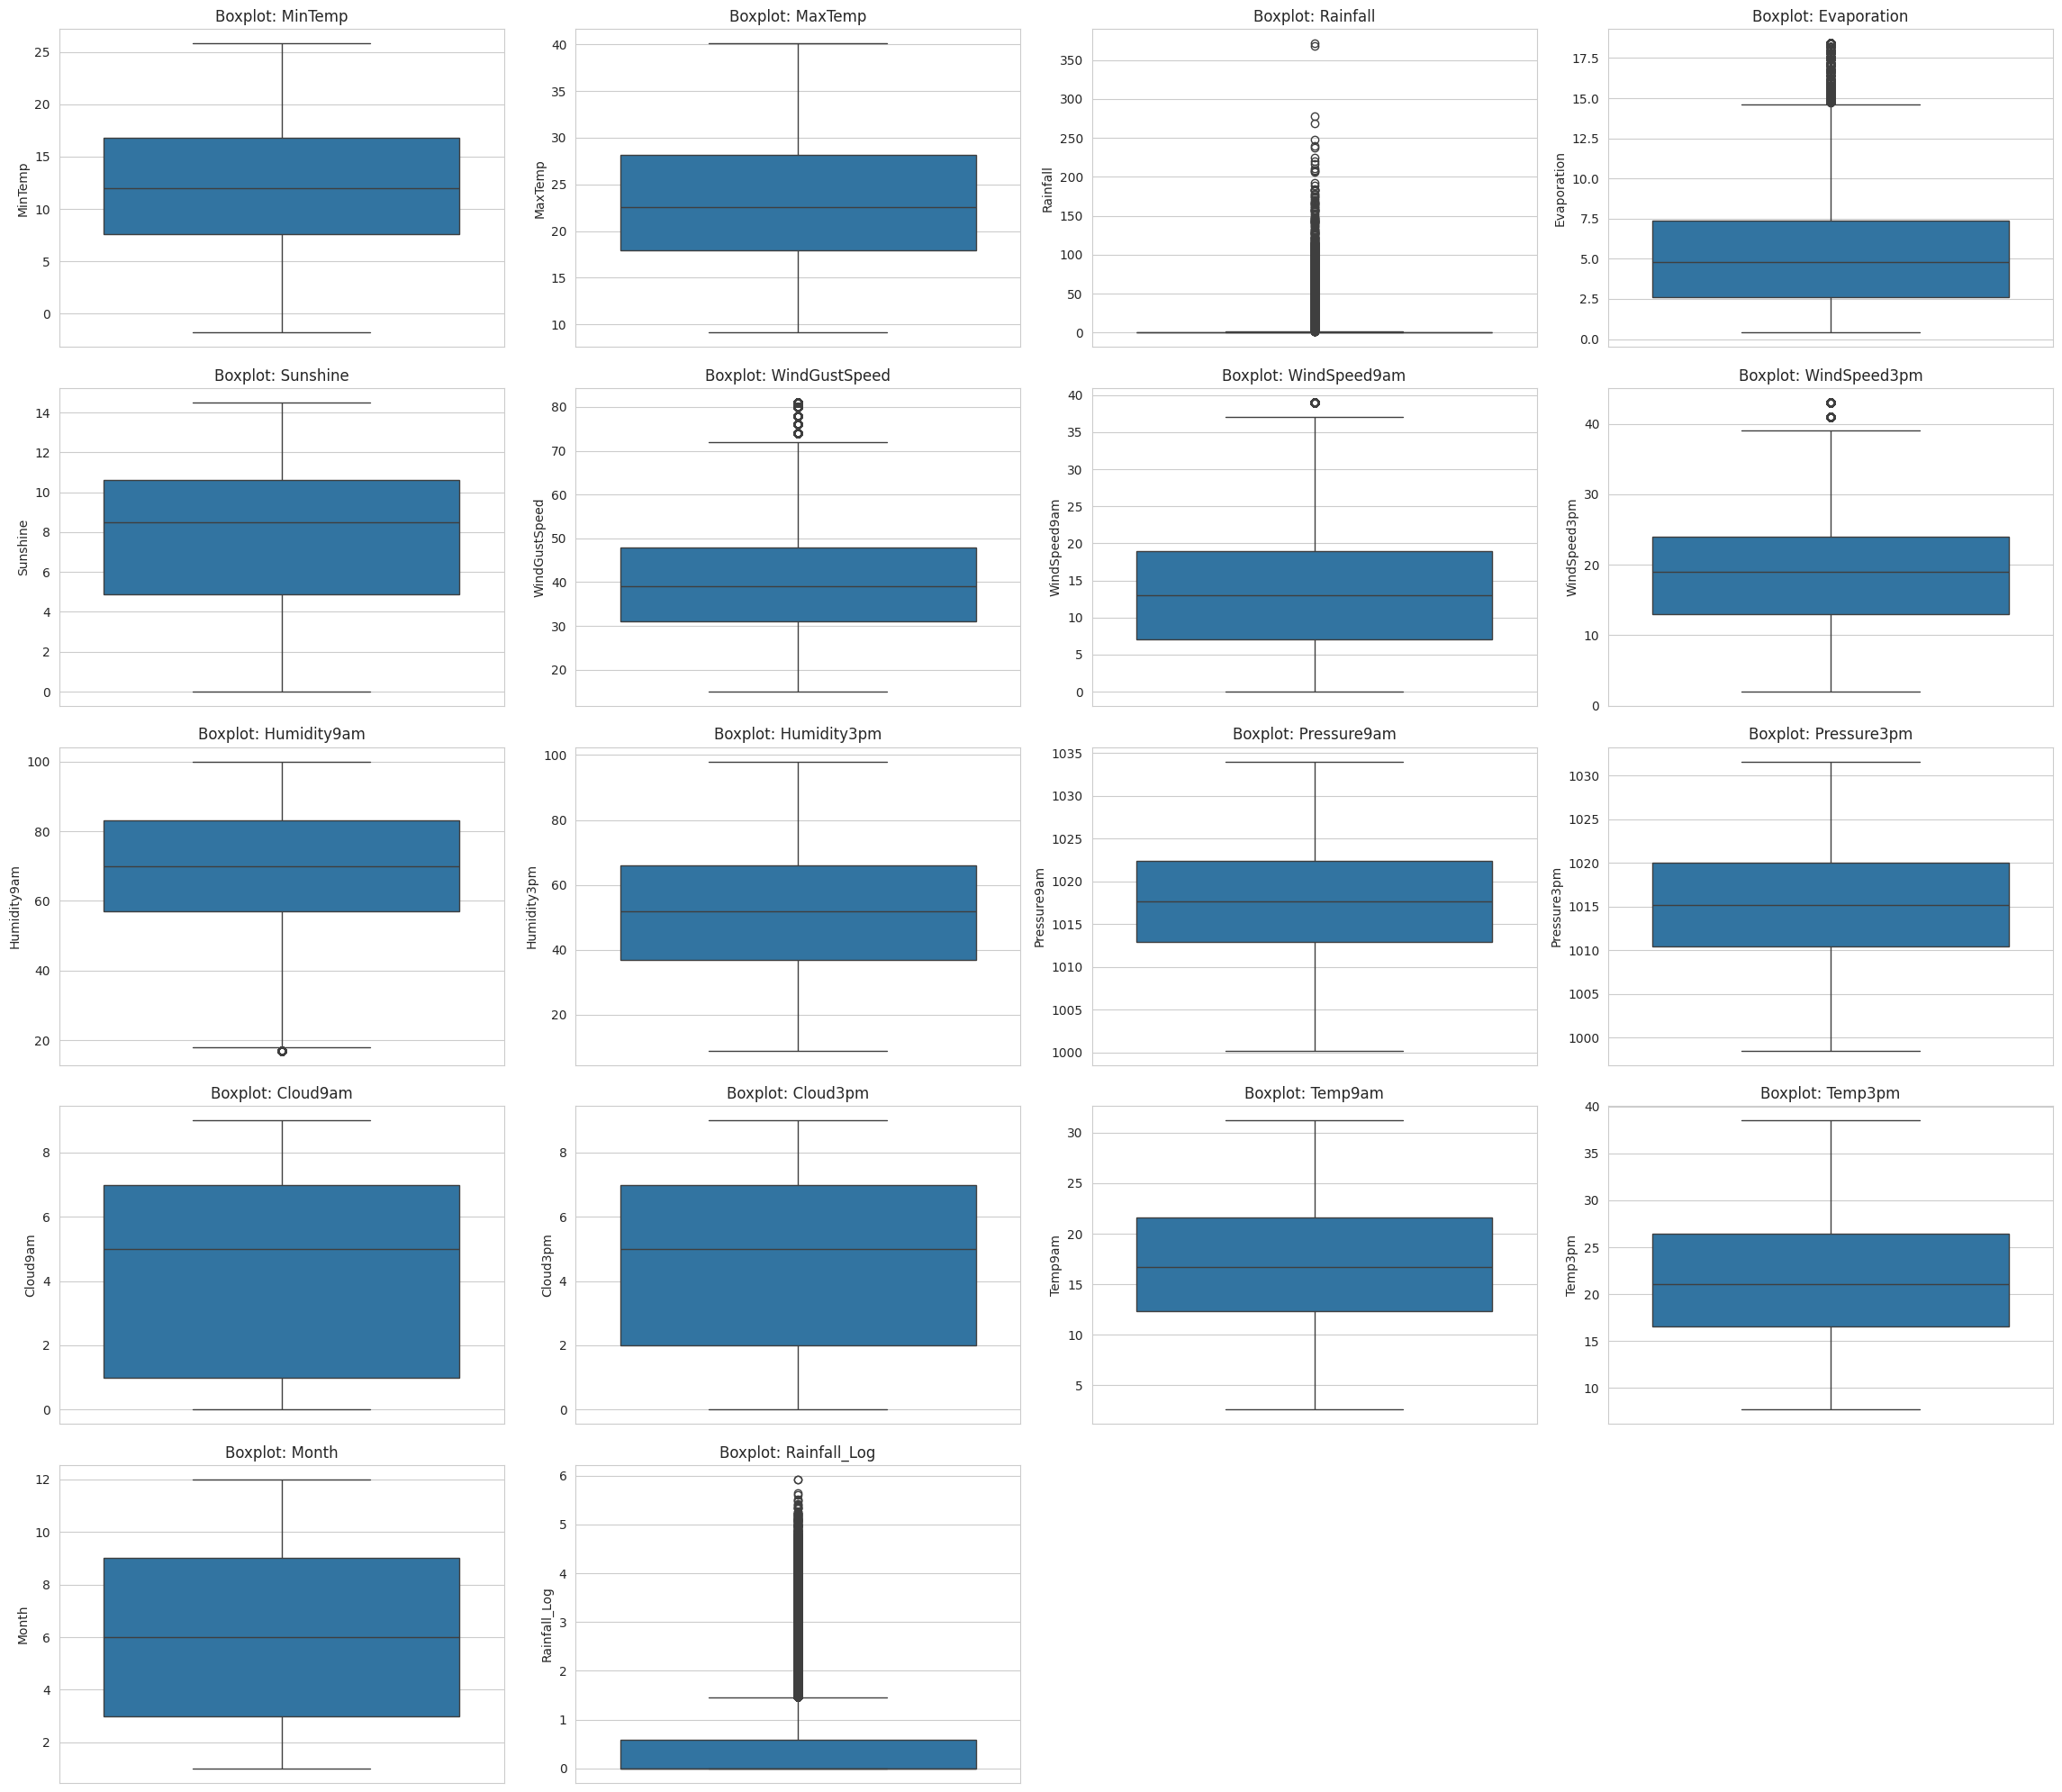

In [ ]:
import math

# Pilih kolom numerik untuk dicek (contoh: curah hujan dan kecepatan angin)
cols_to_check = df.select_dtypes(include=['number']).columns
existing_cols = [c for c in cols_to_check if c not in ["RainToday", "RainTomorrow"]]
n_features = len(existing_cols)


# 2. Setup Grid
n_cols = 4
n_rows = math.ceil(n_features / n_cols)
plt.figure(figsize=(23, 20))

for i, col in enumerate(existing_cols):
    plt.subplot(n_rows, n_cols, i+1)  # Use dynamically calculated n_rows and n_cols
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

In [ ]:
cols_to_astype = ['RainToday', 'RainTomorrow']
df[cols_to_astype] = df[cols_to_astype].astype('object')

def cek_persentase_outlier(df):
    # Hanya ambil kolom numerik
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    outlier_list = []

    for col in numeric_cols:
        # Hitung Q1 (25%) dan Q3 (75%)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Tentukan batas bawah dan atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Hitung jumlah data yang keluar dari batas (outlier)
        total_outlier = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        percentage = (total_outlier / len(df)) * 100

        outlier_list.append({
            'Nama Kolom': col,
            'Jumlah Outlier': total_outlier,
            'Persentase (%)': round(percentage, 2),
            'Skewness': round(df[col].skew(), 2) # Tambahan: Cek kemiringan data
        })

    # Buat dataframe hasil
    outlier_df = pd.DataFrame(outlier_list)

    # Urutkan dari persentase tertinggi
    return outlier_df.sort_values(by='Persentase (%)', ascending=False)

# Jalankan fungsi
laporan_outlier = cek_persentase_outlier(df)
display(laporan_outlier)

,Nama Kolom,Jumlah Outlier,Persentase (%),Skewness
2,Rainfall,25228,17.74,9.89
17,Rainfall_Log,20457,14.39,2.05
5,WindGustSpeed,3006,2.11,0.71
7,WindSpeed3pm,2458,1.73,0.48
3,Evaporation,1954,1.37,1.10
6,WindSpeed9am,1739,1.22,0.55
8,Humidity9am,1419,1.00,-0.44
0,MinTemp,0,0.00,0.04
1,MaxTemp,0,0.00,0.28
4,Sunshine,0,0.00,-0.50


## Imputasi

In [ ]:
import numpy as np
import pandas as pd

# --- FASE 3: SMART IMPUTATION (STRATEGI HIERARKIS) ---
print("Memulai proses Smart Imputation...")

# A. IMPUTASI NUMERIK
# Strategi: Isi null dengan Median spesifik per (Kota + Bulan).
# Jika data Kota+Bulan kosong, mundur ke Median per Bulan, lalu Median Global.

# Ambil kolom numerik (kecuali target & waktu)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cols_to_exclude = ['Month', 'Year', 'Rainfall_Log']
numeric_impute_cols = [c for c in numeric_cols if c not in cols_to_exclude]

for col in numeric_impute_cols:
    if df[col].isnull().sum() > 0:
        # 1. Prioritas Utama: Median berdasarkan [Location + Month]
        df[col] = df[col].fillna(df.groupby(['Location', 'Month'])[col].transform('median'))

        # 2. Prioritas Kedua: Median berdasarkan [Month] (jika lokasi baru/kosong)
        df[col] = df[col].fillna(df.groupby('Month')[col].transform('median'))

        # 3. Prioritas Terakhir: Median Global
        df[col] = df[col].fillna(df[col].median())

# Update kembali Rainfall_Log agar konsisten dengan Rainfall yang baru diisi
df['Rainfall_Log'] = np.log1p(df['Rainfall'])

print("Imputasi Numerik Selesai.")

# B. IMPUTASI KATEGORIKAL
# 1. Perbaiki RainToday
# Jika Rainfall > 1mm maka 'Yes', jika <= 1mm maka 'No'.
df.loc[df['Rainfall'] > 1.0, 'RainToday'] = 'Yes'
df.loc[df['Rainfall'] <= 1.0, 'RainToday'] = 'No'
# Jika masih null (sangat jarang), isi default 'No'
df['RainToday'] = df['RainToday'].fillna('No')

# 2. Imputasi Kolom Kategorikal Lainnya (WindDir, dll)
# Isi dengan Modus (nilai terbanyak) per Lokasi.
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols = [c for c in cat_cols if c != 'RainTomorrow']

for col in cat_cols:
    if df[col].isnull().sum() > 0:
        # Isi dengan Modus per Lokasi
        df[col] = df[col].fillna(df.groupby('Location')[col].transform(
            lambda x: x.mode()[0] if not x.mode().empty else np.nan
        ))

        # Backup: Modus Global jika masih kosong
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].mode()[0])

print("Imputasi Kategorikal Selesai.")

# --- VERIFIKASI AKHIR ---
total_null = df.isnull().sum().sum()
print("-" * 30)
print(f"Status Akhir Missing Values: {total_null}")

if total_null == 0:
    print("SUKSES: Data bersih. Siap untuk Encoding.")
else:
    print("WARNING: Masih ada data kosong. Cek ulang.")
    print(df.isnull().sum()[df.isnull().sum() > 0])

Memulai proses Smart Imputation...
Imputasi Numerik Selesai.
Imputasi Kategorikal Selesai.
------------------------------
Status Akhir Missing Values: 0
SUKSES: Data bersih. Siap untuk Encoding.


## Sanity Check

In [ ]:
# --- FASE 4: VALIDASI INTEGRITAS & FINAL CHECK ---

print("Memulai Sanity Check (Pengecekan Logika Fisika)...")

# 1. Cek Konsistensi Suhu (MinTemp tidak boleh > MaxTemp)
# Logika: Tidak mungkin suhu terendah hari itu lebih panas dari suhu tertingginya.
error_temp_idx = df[df['MinTemp'] > df['MaxTemp']].index
n_error = len(error_temp_idx)

print(f"Ditemukan {n_error} baris dengan MinTemp > MaxTemp.")

if n_error > 0:
    print("Memperbaiki data suhu (Menukar nilai Min dan Max)...")
    # Trik menukar nilai kolom secara vektorisasi (Cepat & Efisien)
    # Kita ambil nilai yang terbalik, lalu kita assign balik dengan posisi yang benar
    cols = ['MinTemp', 'MaxTemp']
    # Values di-swap
    df.loc[error_temp_idx, cols] = df.loc[error_temp_idx, cols].values[:, ::-1]

    # Verifikasi ulang
    sisa_error = len(df[df['MinTemp'] > df['MaxTemp']])
    print(f"Sisa error setelah perbaikan: {sisa_error}")
else:
    print("Integritas Suhu Aman.")

# 2. Cek Konsistensi Lain (Opsional tapi bagus)
# Misal: WindGustSpeed harusnya >= WindSpeed9am dan WindSpeed3pm
# Karena Gust adalah kecepatan angin TERTINGGI hari itu.
error_wind_idx = df[(df['WindGustSpeed'] < df['WindSpeed9am']) |
                    (df['WindGustSpeed'] < df['WindSpeed3pm'])].index
n_error_wind = len(error_wind_idx)

print(f"Ditemukan {n_error_wind} baris dengan WindGustSpeed < WindSpeed harian.")

if n_error_wind > 0:
    # Solusi: Update WindGustSpeed menjadi nilai maksimum dari (Gust, 9am, 3pm)
    print("Memperbaiki data angin (Update GustSpeed menjadi nilai max)...")
    wind_cols = ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']
    # Ambil nilai max dari ketiga kolom tersebut per baris
    df.loc[error_wind_idx, 'WindGustSpeed'] = df.loc[error_wind_idx, wind_cols].max(axis=1)

# 3. FINAL NULL CHECK
print("\n--- FINAL NULL CHECK ---")
total_missing = df.isnull().sum().sum()

print(f"Total Missing Values di seluruh DataFrame: {total_missing}")

if total_missing == 0:
    print("✅ STATUS: LOLOS VALIDASI. Data Konsisten & Bersih.")
    print(f"Dimensi Akhir Data Bersih: {df.shape}")
else:
    print("❌ STATUS: GAGAL. Masih ada null.")
    print(df.isnull().sum()[df.isnull().sum() > 0])

Memulai Sanity Check (Pengecekan Logika Fisika)...
Ditemukan 0 baris dengan MinTemp > MaxTemp.
Integritas Suhu Aman.
Ditemukan 241 baris dengan WindGustSpeed < WindSpeed harian.
Memperbaiki data angin (Update GustSpeed menjadi nilai max)...

--- FINAL NULL CHECK ---
Total Missing Values di seluruh DataFrame: 0
✅ STATUS: LOLOS VALIDASI. Data Konsisten & Bersih.
Dimensi Akhir Data Bersih: (142193, 25)


## Feature Extraction

In [ ]:
import numpy as np

# --- TAHAP A: FEATURE EXTRACTION ---

print("Memulai Feature Extraction...")

# 1. TempRange (Rentang Suhu Harian)
# Menangkap volatilitas cuaca (perbedaan suhu ekstrem)
df['TempRange'] = df['MaxTemp'] - df['MinTemp']

# 2. Cyclical Encoding untuk Bulan
# Mengubah bulan 1-12 menjadi koordinat lingkaran (Sin/Cos)
# Agar model mengerti bahwa Bulan 12 (Des) dekat dengan Bulan 1 (Jan)
df['Month_Sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_Cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# Hapus kolom Month asli karena sudah digantikan representasi siklus
df.drop('Month', axis=1, inplace=True)

# --- VERIFIKASI ---
print("Feature Extraction Selesai.")
print("Fitur Baru Ditambahkan: TempRange, Month_Sin, Month_Cos")
display(df[['Date', 'MinTemp', 'MaxTemp', 'TempRange', 'Month_Sin', 'Month_Cos']].head())

Memulai Feature Extraction...
Feature Extraction Selesai.
Fitur Baru Ditambahkan: TempRange, Month_Sin, Month_Cos


,Date,MinTemp,MaxTemp,TempRange,Month_Sin,Month_Cos
0,2008-12-01,13.4,22.9,9.5,-2.449294e-16,1.0
1,2008-12-02,7.4,25.1,17.7,-2.449294e-16,1.0
2,2008-12-03,12.9,25.7,12.8,-2.449294e-16,1.0
3,2008-12-04,9.2,28.0,18.8,-2.449294e-16,1.0
4,2008-12-05,17.5,32.3,14.8,-2.449294e-16,1.0


## Encoding

In [ ]:
# --- TAHAP B: ENCODING ---

print("Memulai Encoding...")

# 1. Binary Encoding (Manual Mapping)
# Mengubah Yes/No menjadi 1/0
binary_map = {'Yes': 1, 'No': 0}

df['RainTomorrow'] = df['RainTomorrow'].map(binary_map)
df['RainToday'] = df['RainToday'].map(binary_map)

# 2. One-Hot Encoding (OHE)
# Mengubah kategori nominal (Lokasi, Arah Angin) menjadi kolom biner
# drop_first=True wajib untuk menghindari Multicollinearity (Dummy Variable Trap)
cat_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

print(f"Dimensi sebelum OHE: {df.shape}")

# Proses OHE (Otomatis membuat kolom baru misal: Location_Albury, Location_Sydney)
df_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)

print(f"Dimensi setelah OHE: {df_encoded.shape}")

# --- VERIFIKASI ---
print("Encoding Selesai.")
print("Proporsi Target (RainTomorrow):")
print(df_encoded['RainTomorrow'].value_counts(normalize=True))
display(df_encoded.head(3))

Memulai Encoding...
Dimensi sebelum OHE: (142193, 27)
Dimensi setelah OHE: (142193, 116)
Encoding Selesai.
Proporsi Target (RainTomorrow):
RainTomorrow
0    0.775819
1    0.224181
Name: proportion, dtype: float64


,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2008-12-01,13.4,22.9,0.6,6.8,10.1,44.0,20.0,24.0,71.0,...,False,False,False,False,False,False,False,False,True,False
1,2008-12-02,7.4,25.1,0.0,6.8,10.1,44.0,4.0,22.0,44.0,...,False,False,False,False,False,False,False,False,False,True
2,2008-12-03,12.9,25.7,0.0,6.8,10.1,46.0,19.0,26.0,38.0,...,False,False,False,False,False,False,False,False,False,True


## Fitur Selection

In [ ]:
# --- TAHAP C: FEATURE SELECTION & FINAL ENCODING ---

# 1. Daftar kolom redundan yang harus dibuang
# Date & Month: Sudah diganti Month_Sin/Cos
# Rainfall: Sudah diganti Rainfall_Log
cols_to_drop = ['Date', 'Rainfall', 'Month']

# Pastikan hanya membuang kolom yang masih ada di DataFrame
cols_to_drop = [c for c in cols_to_drop if c in df.columns]

# Hapus kolom redundan
df_selected = df.drop(columns=cols_to_drop)

# 2. Final One-Hot Encoding
# Mengubah kolom kategorikal nominal menjadi dummy variable (0/1)
# pd.get_dummies otomatis MENGHAPUS kolom asli (Location, dll) dan menggantinya
cat_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

# Pastikan kolom kategorikal ada sebelum encoding
cat_features = [c for c in cat_features if c in df_selected.columns]

df_final = pd.get_dummies(df_selected, columns=cat_features, drop_first=True)

# --- VERIFIKASI AKHIR ---
print(f"--- Laporan Feature Selection ---")
print(f"Kolom Dibuang           : {cols_to_drop}")
print(f"Dimensi Data Final      : {df_final.shape}")
print("-" * 30)
print("Preview 5 Baris Data Final (Siap Split):")
display(df_final.head())

--- Laporan Feature Selection ---
Kolom Dibuang           : ['Date', 'Rainfall']
Dimensi Data Final      : (142193, 114)
------------------------------
Preview 5 Baris Data Final (Siap Split):


,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,6.8,10.1,44.0,20.0,24.0,71.0,22.0,1007.7,...,False,False,False,False,False,False,False,False,True,False
1,7.4,25.1,6.8,10.1,44.0,4.0,22.0,44.0,25.0,1010.6,...,False,False,False,False,False,False,False,False,False,True
2,12.9,25.7,6.8,10.1,46.0,19.0,26.0,38.0,30.0,1007.6,...,False,False,False,False,False,False,False,False,False,True
3,9.2,28.0,6.8,10.1,24.0,11.0,9.0,45.0,16.0,1017.6,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,6.8,10.1,41.0,7.0,20.0,82.0,33.0,1010.8,...,False,True,False,False,False,False,False,False,False,False


## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- BARU MASUK KE TAHAP SPLITTING ---
# 1. Definisi Fitur (X) dan Target (y)
X = df_final.drop('RainTomorrow', axis=1)
y = df_final['RainTomorrow']

# ... (lanjutan kode splitting kamu)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Data Scaling

In [ ]:
# --- TAHAP E: SCALING (STANDARISASI) ---

# 3. Inisialisasi Scaler
scaler = StandardScaler()

# 4. Fit & Transform
# ATURAN EMAS: Fit hanya pada Training Data, lalu Transform ke Test Data.
# Ini agar model tidak "mengintip" distribusi data masa depan (Test set).

# Gunakan DataFrame baru agar nama kolom tetap terjaga (penting untuk Feature Importance nanti)
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# --- VERIFIKASI ---
print(f"--- Laporan Akhir Data Preparation ---")
print(f"Jumlah Data Train : {X_train_scaled.shape[0]} baris")
print(f"Jumlah Data Test  : {X_test_scaled.shape[0]} baris")
print("-" * 30)
print("Preview Statistik Data Train (Mean harus ~0, Std harus ~1):")
display(X_train_scaled.describe().round(2).loc[['mean', 'std'], :].iloc[:, :5]) # Cek 5 kolom pertama

--- Laporan Akhir Data Preparation ---
Jumlah Data Train : 113754 baris
Jumlah Data Test  : 28439 baris
------------------------------
Preview Statistik Data Train (Mean harus ~0, Std harus ~1):


,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed
mean,-0.0,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0


# Modeling

## Baseline and Model Spot Checking

Spot Check Berbagai Algoritma

Ratio Imbalance untuk Boosting: 3.46

Mulai Training 5 Model Sekaligus...
-> Sedang melatih: Logistic Regression...
-> Sedang melatih: Decision Tree...
-> Sedang melatih: Random Forest...
-> Sedang melatih: XGBoost...
-> Sedang melatih: LightGBM...

--- HASIL LEADERBOARD SEMENTARA ---


,Model,ROC-AUC,Recall (Sensitivitas),Accuracy,F1-Score
3,XGBoost,0.894589,0.783843,0.821161,0.662732
4,LightGBM,0.891128,0.800627,0.805373,0.648415
2,Random Forest,0.889005,0.475922,0.853898,0.593564
0,Logistic Regression,0.875267,0.782275,0.797461,0.633914
1,Decision Tree,0.699428,0.532549,0.791413,0.533721


/tmp/ipython-input-795995452.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='ROC-AUC', palette='viridis')


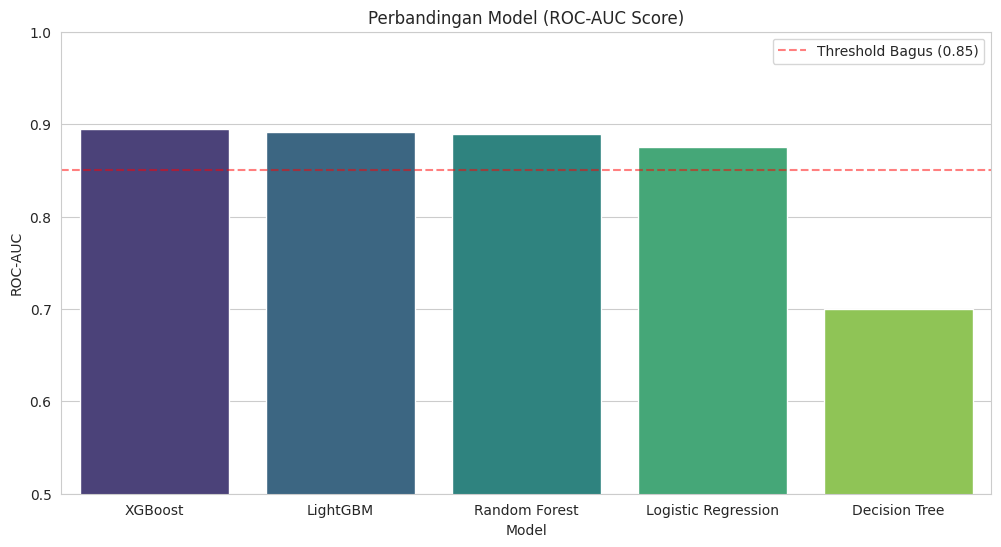

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score

# --- FASE 1: BASELINE & MODEL SPOT-CHECKING (KOMPREHENSIF) ---

# Hitung scale_pos_weight untuk XGBoost/LightGBM
# Rumus: (Jumlah Kelas 0) / (Jumlah Kelas 1)
ratio = float(y_train.value_counts()[0]) / y_train.value_counts()[1]
print(f"Ratio Imbalance untuk Boosting: {ratio:.2f}")

# 1. Inisialisasi 5 Model Kandidat
models = {
    # A. Linear (Baseline paling sederhana)
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),

    # B. Tree (Baseline interpretabilitas - mudah overfitting tapi mudah dijelaskan)
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),

    # C. Ensemble Bagging (Lebih stabil dari Decision Tree)
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42),

    # D. Ensemble Boosting (Juara performa)
    "XGBoost": XGBClassifier(scale_pos_weight=ratio, eval_metric='logloss', random_state=42, n_jobs=-1),
    "LightGBM": LGBMClassifier(scale_pos_weight=ratio, random_state=42, n_jobs=-1, verbose=-1)
}

# 2. Loop Training & Evaluasi
results = []
print("\nMulai Training 5 Model Sekaligus...")

for name, model in models.items():
    print(f"-> Sedang melatih: {name}...")

    # Train
    model.fit(X_train_scaled, y_train)

    # Predict (Probabilitas dibutuhkan untuk ROC-AUC)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Hitung Metrics
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "ROC-AUC": roc,           # Metric utama kita (karena imbalance)
        "Recall (Sensitivitas)": recall, # Penting untuk deteksi hujan
        "Accuracy": acc,
        "F1-Score": f1
    })

# 3. Tampilkan Hasil Komparasi
results_df = pd.DataFrame(results).sort_values(by='ROC-AUC', ascending=False)

print("\n--- HASIL LEADERBOARD SEMENTARA ---")
display(results_df)

# 4. Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='ROC-AUC', palette='viridis')
plt.title('Perbandingan Model (ROC-AUC Score)')
plt.ylim(0.5, 1.0) # Fokus pada area performa di atas random guessing
plt.axhline(0.85, color='red', linestyle='--', alpha=0.5, label='Threshold Bagus (0.85)')
plt.legend()
plt.show()

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# --- FASE 1: CROSS-VALIDATION (5-FOLD) ---

# 1. Setup Cross-Validation (Stratified agar proporsi target tetap sama tiap fold)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Memulai 5-Fold Cross-Validation (Metric: ROC-AUC)...")
print("-" * 60)
print(f"{'Model':<20} | {'Mean ROC-AUC':<15} | {'Std Dev':<10} | {'Status'}")
print("-" * 60)

# Gunakan model yang sudah didefinisikan sebelumnya
for name, model in models.items():
    # Hitung skor CV (fokus pada ROC-AUC karena imbalance)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=cv_strategy, scoring='roc_auc', n_jobs=-1)

    mean_score = scores.mean()
    std_dev = scores.std()

    # Status: Stabil jika Std Dev kecil (< 0.02 biasanya bagus)
    stability = "Stabil" if std_dev < 0.02 else "Labil"

    print(f"{name:<20} | {mean_score:.4f}          | {std_dev:.4f}     | {stability}")

print("-" * 60)

Memulai 5-Fold Cross-Validation (Metric: ROC-AUC)...
------------------------------------------------------------
Model                | Mean ROC-AUC    | Std Dev    | Status
------------------------------------------------------------
Logistic Regression  | 0.8722          | 0.0023     | Stabil
Decision Tree        | 0.6937          | 0.0023     | Stabil
Random Forest        | 0.8834          | 0.0017     | Stabil
XGBoost              | 0.8889          | 0.0018     | Stabil
LightGBM             | 0.8871          | 0.0022     | Stabil
------------------------------------------------------------


## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# --- FASE 2: HANDLING IMBALANCED DATA (SMOTE vs CLASS WEIGHT) ---

print("--- Komparasi Strategi Imbalance ---")

# 1. Setup Data dengan SMOTE
# PENTING: SMOTE hanya diterapkan pada TRAINING SET. Jangan pernah sentuh Test Set!
print("Melakukan SMOTE Oversampling pada Data Train...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"Proporsi Target Awal : {y_train.value_counts().to_dict()}")
print(f"Proporsi Setelah SMOTE: {y_train_smote.value_counts().to_dict()} (Seimbang)")

# 2. Train Model A: Menggunakan Class Weight (Yang sudah kita lakukan sebelumnya)
# Kita latih ulang sebentar untuk memastikan perbandingan fair
model_weight = XGBClassifier(scale_pos_weight=ratio, eval_metric='logloss', random_state=42, n_jobs=-1)
model_weight.fit(X_train_scaled, y_train)

# 3. Train Model B: Menggunakan Data SMOTE
# Note: Di sini kita TIDAK pakai scale_pos_weight karena data sudah seimbang berkat SMOTE
model_smote = XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1)
model_smote.fit(X_train_smote, y_train_smote)

# 4. Evaluasi & Komparasi
models_imbalance = {'Class Weighting': model_weight, 'SMOTE Oversampling': model_smote}

results_imbalance = []

for name, model in models_imbalance.items():
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    roc = roc_auc_score(y_test, y_prob)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results_imbalance.append({
        "Strategy": name,
        "ROC-AUC": roc,
        "Recall (Deteksi Hujan)": recall,
        "F1-Score": f1
    })

# Tampilkan Hasil
df_imbalance = pd.DataFrame(results_imbalance)
display(df_imbalance)

--- Komparasi Strategi Imbalance ---
Melakukan SMOTE Oversampling pada Data Train...
Proporsi Target Awal : {0: 88252, 1: 25502}
Proporsi Setelah SMOTE: {0: 88252, 1: 88252} (Seimbang)


,Strategy,ROC-AUC,Recall (Deteksi Hujan),F1-Score
0,Class Weighting,0.894589,0.783843,0.662732
1,SMOTE Oversampling,0.891457,0.575059,0.644855


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import time

# --- FASE 3: HYPERPARAMETER TUNING (XGBoost) ---

print("Memulai Tuning XGBoost dengan RandomizedSearchCV...")

# 1. Definisi Ruang Parameter (Hyperparameter Space)
param_dist = {
    'n_estimators': [100, 200, 300, 500],      # Jumlah pohon
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   # Step size shrinkage
    'max_depth': [3, 5, 7, 10],               # Kedalaman maksimum pohon
    'min_child_weight': [1, 3, 5],            # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0, 0.1, 0.2, 0.3],              # Minimum loss reduction required to make a further partition
    'subsample': [0.7, 0.8, 0.9, 1.0],        # Subsample ratio of columns
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]  # Subsample ratio of columns when constructing each tree
}

# 2. Inisialisasi Model Dasar
# scale_pos_weight=ratio (diambil dari perhitungan sebelumnya untuk imbalance)
xgb_base = XGBClassifier(
    scale_pos_weight=ratio,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

# 3. Setup Randomized Search
# n_iter=30: Akan mencoba 30 kombinasi acak
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=30,
    scoring='roc_auc',  # Fokus maksimalkan ROC-AUC
    cv=3,               # 3-Fold CV untuk efisiensi waktu
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 4. Eksekusi Tuning
start_time = time.time()
random_search.fit(X_train_scaled, y_train)
end_time = time.time()

# 5. Output Hasil Terbaik
print(f"\nTuning Selesai dalam {(end_time - start_time)/60:.2f} menit.")
print("-" * 50)
print(f"Best ROC-AUC Score: {random_search.best_score_:.4f}")
print("Best Hyperparameters:")
print(random_search.best_params_)

# Simpan model terbaik ke variabel
best_model = random_search.best_estimator_

Memulai Tuning XGBoost dengan RandomizedSearchCV...
Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Tuning Selesai dalam 10.90 menit.
--------------------------------------------------
Best ROC-AUC Score: 0.8930
Best Hyperparameters:
{'subsample': 0.7, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 1.0}


# Model Evaluation

--- Evaluasi Mendalam Model Terbaik (XGBoost Tuned) ---

1. Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89     22064
           1       0.62      0.75      0.68      6375

    accuracy                           0.84     28439
   macro avg       0.77      0.81      0.79     28439
weighted avg       0.85      0.84      0.85     28439

2. ROC-AUC Score Final: 0.9003


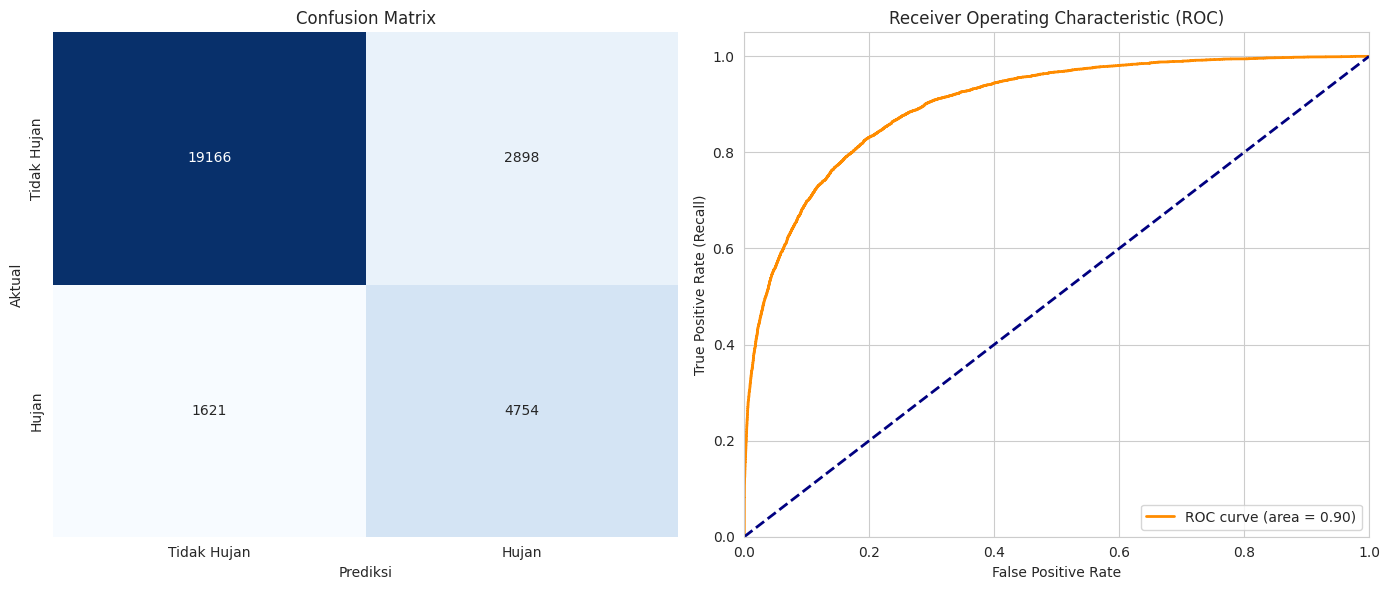

/tmp/ipython-input-55156424.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


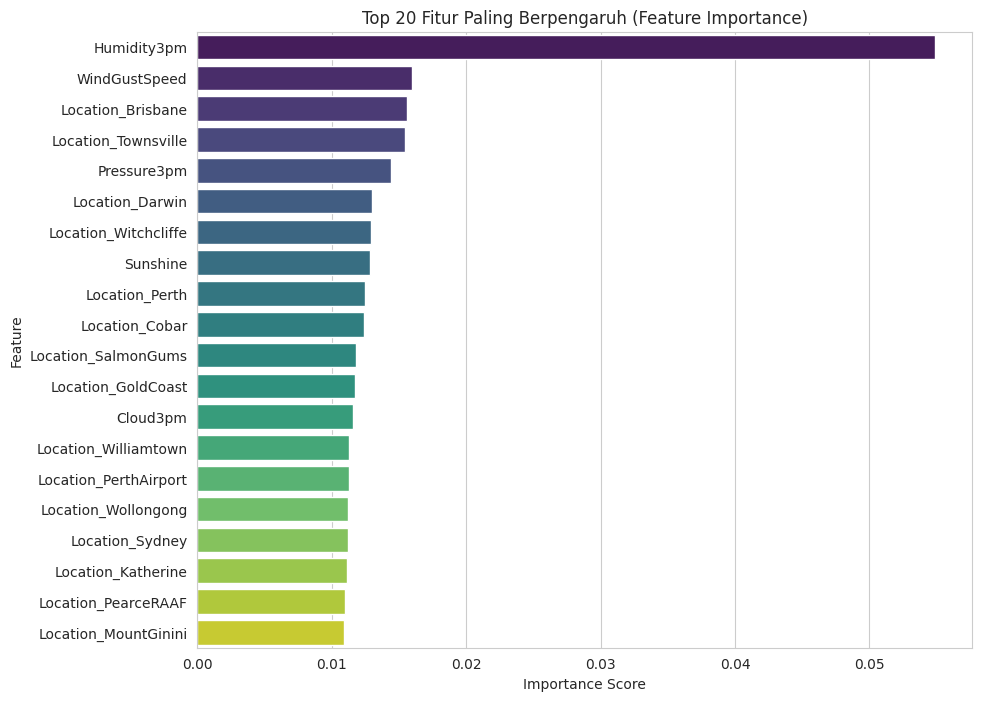

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# --- FASE 4: DEEP EVALUATION ---

print("--- Evaluasi Mendalam Model Terbaik (XGBoost Tuned) ---")

# 1. Prediksi pada Data Test (Data yang belum pernah dilihat model)
y_pred_final = best_model.predict(X_test_scaled)
y_prob_final = best_model.predict_proba(X_test_scaled)[:, 1]

# 2. Metric Utama (Precision, Recall, F1, ROC-AUC)
print("\n1. Classification Report:")
print(classification_report(y_test, y_pred_final))

roc_auc = roc_auc_score(y_test, y_prob_final)
print(f"2. ROC-AUC Score Final: {roc_auc:.4f}")

# 3. Visualisasi Confusion Matrix & ROC Curve
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot A: Confusion Matrix
# Menunjukkan: Berapa banyak Hujan yang terdeteksi (True Positive) vs Terlewat (False Negative)
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0], cbar=False)
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Prediksi')
ax[0].set_ylabel('Aktual')
ax[0].set_xticklabels(['Tidak Hujan', 'Hujan'])
ax[0].set_yticklabels(['Tidak Hujan', 'Hujan'])

# Plot B: ROC Curve
# Menunjukkan: Trade-off antara Sensitivity (Recall) vs False Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_prob_final)
ax[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate (Recall)')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

# 4. Feature Importance (Intip "Otak" Model)
# Mengetahui variabel apa yang paling menentukan hujan/tidak
plt.figure(figsize=(10, 8))
# Ambil feature importance dari model
importances = best_model.feature_importances_
feature_names = X_train_scaled.columns

# Buat dataframe untuk plotting
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False).head(20) # Top 20 Fitur

sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Top 20 Fitur Paling Berpengaruh (Feature Importance)')
plt.xlabel('Importance Score')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score

# 1. Hitung Skor untuk Training Data (Hafalan)
y_pred_train = best_model.predict(X_train_scaled)
y_prob_train = best_model.predict_proba(X_train_scaled)[:, 1]

train_acc = accuracy_score(y_train, y_pred_train)
train_auc = roc_auc_score(y_train, y_prob_train)

# 2. Hitung Skor untuk Test Data (Ujian Asli)
# (Ini sudah kamu hitung sebelumnya, kita panggil lagi biar rapi)
y_pred_test = best_model.predict(X_test_scaled)
y_prob_test = best_model.predict_proba(X_test_scaled)[:, 1]

test_acc = accuracy_score(y_test, y_pred_test)
test_auc = roc_auc_score(y_test, y_prob_test)

# 3. Tampilkan Perbandingan
print(f"--- PERBANDINGAN PERFORMA ---")
print(f"Training Accuracy : {train_acc:.4f}")
print(f"Test Accuracy     : {test_acc:.4f}")
print(f"Gap (Selisih)     : {train_acc - test_acc:.4f}")
print("-" * 30)
print(f"Training ROC-AUC  : {train_auc:.4f}")
print(f"Test ROC-AUC      : {test_auc:.4f}")
print(f"Gap (Selisih)     : {train_auc - test_auc:.4f}")

--- PERBANDINGAN PERFORMA ---
Training Accuracy : 0.9297
Test Accuracy     : 0.8411
Gap (Selisih)     : 0.0886
------------------------------
Training ROC-AUC  : 0.9853
Test ROC-AUC      : 0.9003
Gap (Selisih)     : 0.0851


# Model Deployment

In [ ]:
import joblib
import os

# 1. Membuat folder khusus 'model' agar file tertata rapi
if not os.path.exists('model'):
    os.makedirs('model')

# 2. Menyiapkan daftar nama fitur (kolom)
feature_columns = list(X_train.columns)

# 3. Menyimpan objek ke format .joblib
joblib.dump(random_search.best_estimator_, 'model/xgb_weather_model.joblib')

# Simpan Scaler (Pastikan variabel 'scaler' masih ada di memori)
joblib.dump(scaler, 'model/scaler.joblib')

# Simpan Urutan Kolom
joblib.dump(feature_columns, 'model/feature_columns.joblib')

print("✅ Eksportasi Selesai!")
print("File tersimpan di folder 'model/':")
print("- xgb_weather_model.joblib (Diambil dari random_search)")
print("- scaler.joblib")
print("- feature_columns.joblib")

✅ Eksportasi Selesai!
File tersimpan di folder 'model/':
- xgb_weather_model.joblib (Diambil dari random_search)
- scaler.joblib
- feature_columns.joblib
